<div style="text-align: center; font-size: 36px;">
    Student Pledge
</div>

By answering the questions in this notebook, I pledge that I will **not use any AI tools or external sources** to assist me in completing this exam. I affirm that the work submitted is entirely my own and was completed without any form of plagiarism or external help. I understand that any violation of these terms will result in **serious consequences** as per the institute's policy.

I agree to the above terms and conditions by submitting this notebook.

---

### Important:
- You **must not delete** this cell or any part of this notebook.
- All answers **must be written below** the respective cells for each question.
- **Deleting or altering this cell** will result in **your submission not being accepted**.
- Submit the same notebook file with your code solutions.

# Name: M PRAVEEN KUMAR   

## Roll Num: P2522036

## **Instructions**

1. **Submission Guidelines**:
   - Complete the project in the provided Jupyter Notebook file only. Submissions in any other format (e.g., `.zip`, `.py`) will not be accepted.
   - Mention your **Name** and **Roll Number** clearly at the top of the notebook.
   - Write inferences in the text cells provided below each solution. Ensure clarity and precision in your explanations.
   - **Last date to submit project**: 18 Jan 2026 (EoD).

   

---

## Marks Distribution
- Total Marks: 25  
  - Question 1 → 5 Marks (CO1 / PO1)
  - Question 2 → 10 Marks (CO2 / PO2)  
  - Question 3 → 10 Marks (CO3 / PO2)

---

# Long-Term Cardiovascular Risk Assessment Using Clinical and Lifestyle Indicators

---

## Background

Cardiovascular disorders develop progressively due to a combination of **demographic factors**, **lifestyle habits**, and **clinical measurements**. Coronary heart disease (CHD) is rarely caused by a single condition; instead, it emerges from the interaction of multiple risk factors such as smoking intensity, blood pressure, cholesterol levels, metabolic health, and age.

A healthcare analytics team has collected anonymized patient records during routine medical examinations. These patients were monitored over an extended period to observe whether they experienced a major coronary event. The collected data reflects real-world clinical complexity, where risk factors often coexist and influence each other.

---

## Objective

The objective of this project is to build a **classification system** that predicts whether a patient is likely to experience a **coronary heart disease event during a long-term follow-up period**.

The resulting model should support preventive healthcare by:
- Flagging individuals who may require closer medical attention
- Assisting clinicians in early risk stratification
- Providing a data-driven understanding of long-term cardiovascular risk

---

## Dataset Description

Each row in the dataset represents a single patient record collected at baseline. The dataset contains a mixture of demographic attributes, lifestyle indicators, and clinical measurements.

### Features

- **male**: Gender indicator (`1` → Male, `0` → Female)  
- **age**: Age of the patient (in years)  
- **education**: Education level (ordinal, numerically encoded)  
- **currentSmoker**: Current smoking status (`1` → Yes, `0` → No)  
- **cigsPerDay**: Average number of cigarettes smoked per day  
- **BPMeds**: Blood pressure medication status (`1` → Yes, `0` → No)  
- **prevalentStroke**: Prior history of stroke (`1` → Yes, `0` → No)  
- **prevalentHyp**: Prior history of hypertension (`1` → Yes, `0` → No)  
- **diabetes**: Diabetes status (`1` → Yes, `0` → No)  
- **totChol**: Total cholesterol level  
- **sysBP**: Systolic blood pressure  
- **diaBP**: Diastolic blood pressure  
- **BMI**: Body Mass Index  
- **heartRate**: Resting heart rate  
- **glucose**: Blood glucose level  

---

### Target Variable

- **TenYearCHD**: Long-term coronary heart disease outcome  
  - `1` → Coronary event observed  
  - `0` → No coronary event observed  

---

## Problem Context

Medical research suggests that long-term coronary risk arises from **interacting factors** rather than isolated measurements. For example:

- High cigarette consumption combined with elevated blood pressure significantly increases risk.
- Age-related risk is amplified by metabolic indicators such as cholesterol and glucose.
- Medication may control symptoms without eliminating underlying risk.

Initial modeling attempts showed **limited generalization**. Some simple approaches failed to capture complex interactions, while more complex approaches demonstrated signs of **overfitting**, indicating the need for careful model selection and refinement.

---

## Assessment Questions

### **Question 1 — Baseline Classification Approaches**  
**Marks: 5**

Develop and evaluate multiple baseline classification approaches to predict long-term coronary heart disease risk. Analyze their performance on unseen data and discuss observed limitations in capturing complex risk patterns.

---

### **Question 2 — Ensemble-Based Modeling Approaches**  
**Marks: 10**

Build and compare different ensemble-based classification approaches to model long-term coronary risk. Examine whether combining multiple learners improves predictive stability and generalization compared to baseline approaches.

---

### **Question 3 — Model Refinement and Parameter Optimization**  
**Marks: 10**

Refine selected models by appropriately adjusting model parameters to improve performance and reduce overfitting. Justify the chosen parameter settings and present the final model recommended for clinical risk assessment.

---

## Practical Considerations

- Missing a high-risk patient may delay preventive care
- Incorrectly flagging low-risk patients may lead to unnecessary intervention
- Model reliability is therefore as important as predictive performance

---

## Deliverables

- A single Jupyter Notebook containing:
  - Data exploration and preparation
  - Model development and comparison
  - Performance evaluation
  - Final conclusions and recommendations

All analysis must be reproducible within the submitted notebook.

---

## Expected Outcome

The final solution should demonstrate:
- Robust performance on unseen patient data
- Effective use of ensemble reasoning
- Controlled model complexity
- Clear justification for modeling choices

This project reflects a real-world healthcare analytics scenario where **generalization and reasoning matter as much as prediction accuracy**.


In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Heart.csv") 
df.shape 

(4240, 16)

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4240 non-null   category
 1   age              4240 non-null   int64   
 2   education        4135 non-null   float64 
 3   currentSmoker    4240 non-null   category
 4   cigsPerDay       4211 non-null   float64 
 5   BPMeds           4187 non-null   category
 6   prevalentStroke  4240 non-null   category
 7   prevalentHyp     4240 non-null   category
 8   diabetes         4240 non-null   category
 9   totChol          4190 non-null   float64 
 10  sysBP            4240 non-null   float64 
 11  diaBP            4240 non-null   float64 
 12  BMI              4221 non-null   float64 
 13  heartRate        4239 non-null   float64 
 14  glucose          3852 non-null   float64 
 15  TenYearCHD       4240 non-null   category
dtypes: category(7), float64(8), int64(1)
memor

In [5]:
df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Missing Values : education, cigsPerDay, BPMeds, totChol, BMI, glucose

In [6]:
import numpy as np

# We are imputing "naN" to Blank Values
invalid_zero_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']
df[invalid_zero_cols] = df[invalid_zero_cols].replace("", np.nan)

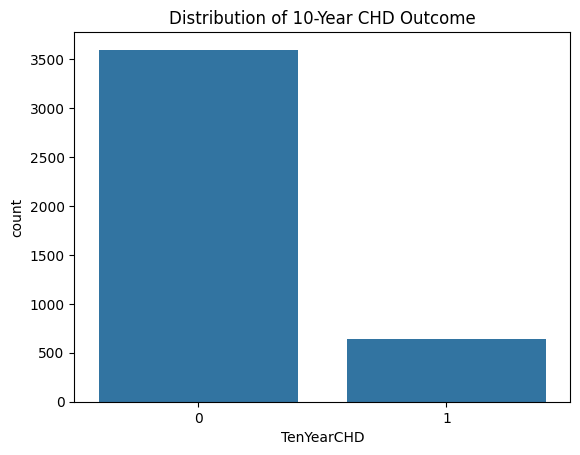

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="TenYearCHD", data=df)
plt.title("Distribution of 10-Year CHD Outcome")
plt.show()


**The target variable shows class imbalance, with significantly fewer coronary events compared to non-events. In a medical risk prediction setting, this imbalance highlights the importance of recall and ROC-AUC over raw accuracy, as missing high-risk patients has serious clinical consequences.**

In [8]:
# TYPECASTING

In [9]:
Cat_cols = [
    "male",
    "currentSmoker",
    "prevalentStroke",
    "prevalentHyp",
    "diabetes",
    "BPMeds",
    "TenYearCHD"
]

df[Cat_cols] = df[Cat_cols].astype("category")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4240 non-null   category
 1   age              4240 non-null   int64   
 2   education        4135 non-null   float64 
 3   currentSmoker    4240 non-null   category
 4   cigsPerDay       4211 non-null   float64 
 5   BPMeds           4187 non-null   category
 6   prevalentStroke  4240 non-null   category
 7   prevalentHyp     4240 non-null   category
 8   diabetes         4240 non-null   category
 9   totChol          4190 non-null   float64 
 10  sysBP            4240 non-null   float64 
 11  diaBP            4240 non-null   float64 
 12  BMI              4221 non-null   float64 
 13  heartRate        4239 non-null   float64 
 14  glucose          3852 non-null   float64 
 15  TenYearCHD       4240 non-null   category
dtypes: category(7), float64(8), int64(1)
memor

# Univariate Analysis

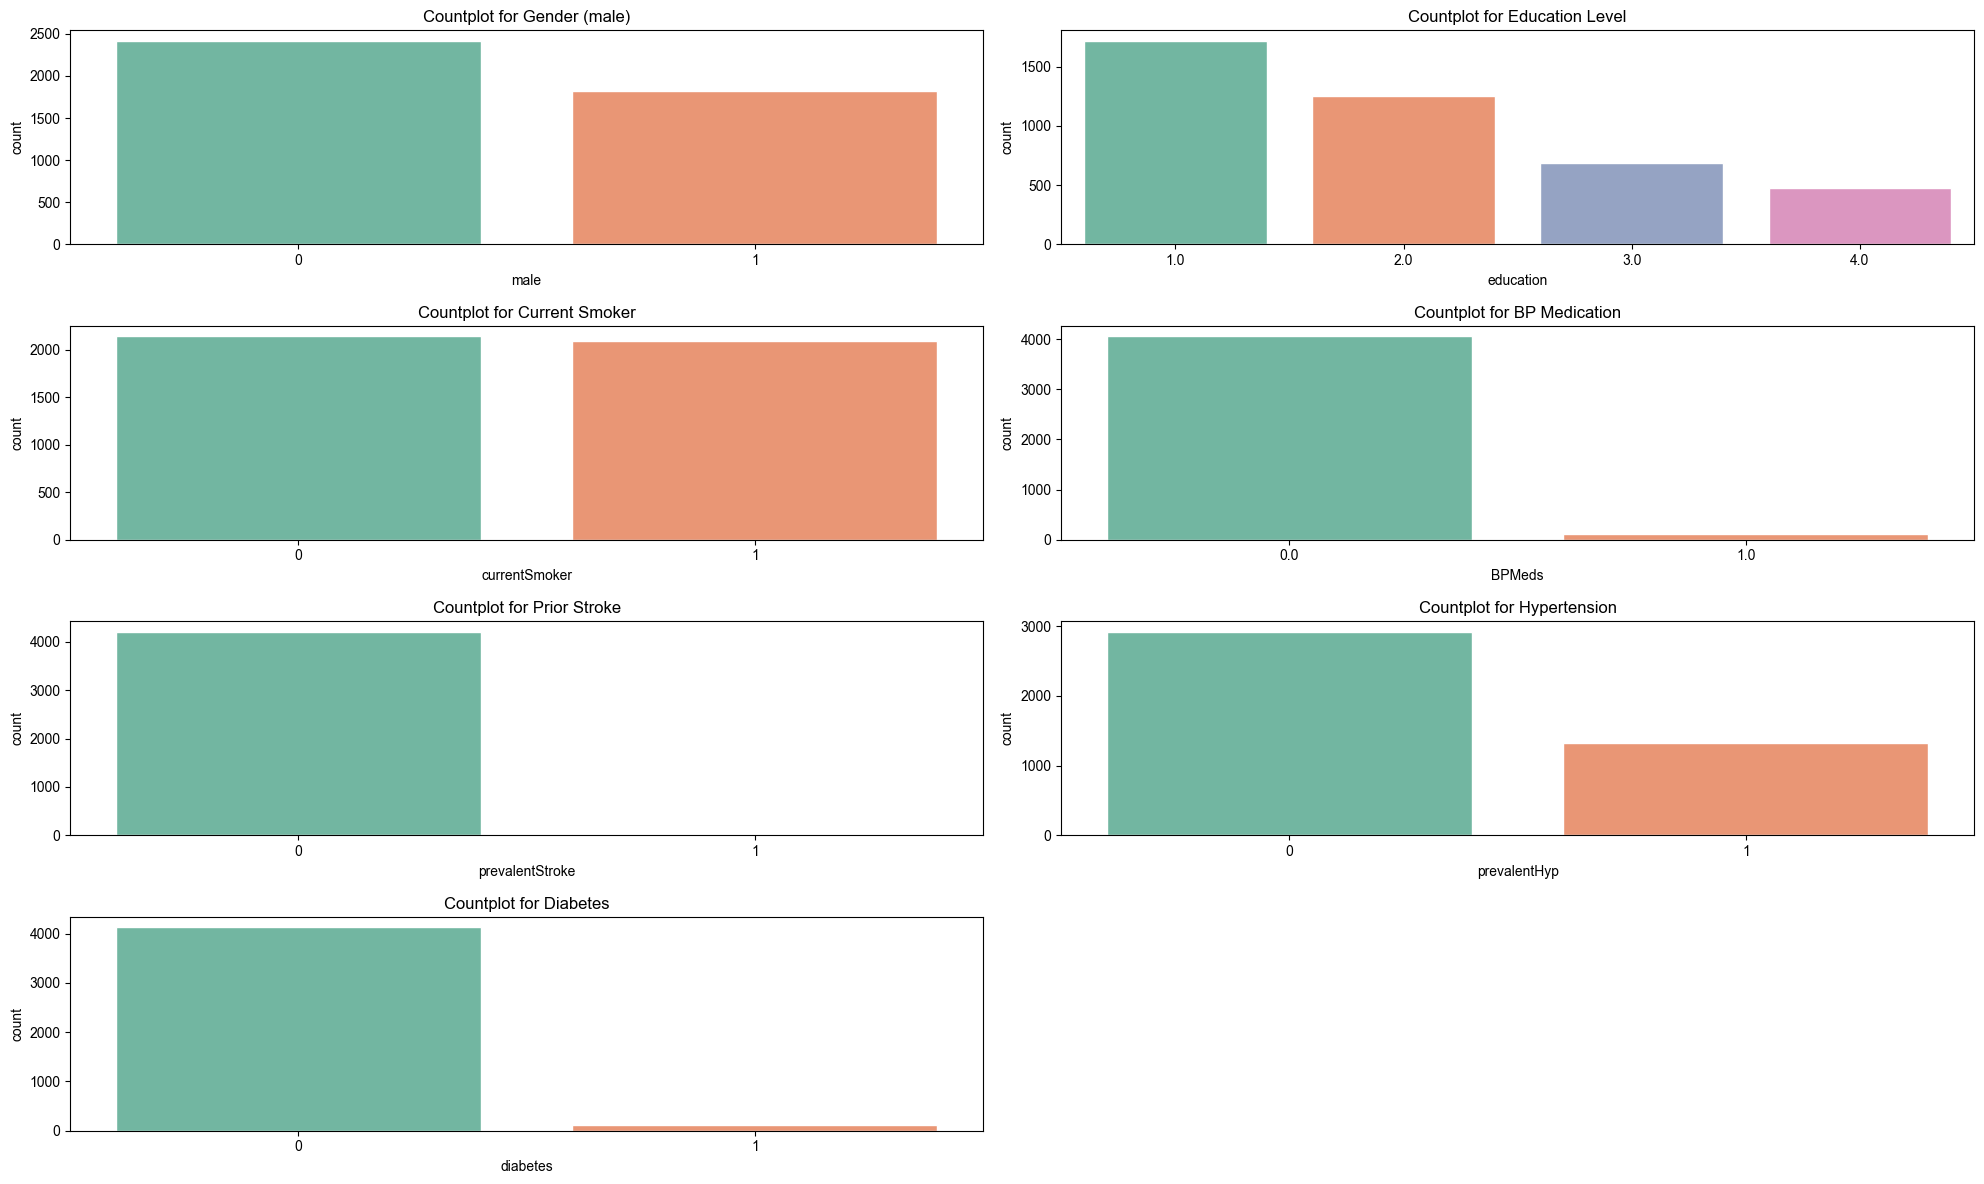

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 2, figsize=(20, 12))
sns.set(style="whitegrid")


# Row 1
sns.countplot(data=df, x='male', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Countplot for Gender (male)')

sns.countplot(data=df, x='education', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Countplot for Education Level')

# Row 2
sns.countplot(data=df, x='currentSmoker', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Countplot for Current Smoker')

sns.countplot(data=df, x='BPMeds', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Countplot for BP Medication')

# Row 3
sns.countplot(data=df, x='prevalentStroke', ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Countplot for Prior Stroke')

sns.countplot(data=df, x='prevalentHyp', ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Countplot for Hypertension')

# Row 4
sns.countplot(data=df, x='diabetes', ax=axes[3, 0], palette='Set2')
axes[3, 0].set_title('Countplot for Diabetes')

#fig.delaxes(axes[3, 1])
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()



Classes are balanced in Current Smoker Feature.
    
Nearly balanced classes we have in Gender => Female subjects are Higher compared to Male.

Education - Counts are linearly reducing from 1 to 4, that represents 1 we can take as secondary education - Bachelors - Masters - PhD

BP Medication - Class imbalanced => Very few counts are taking BP Meds.

Prior Stroke - Class Imbalance => very few people got Prior Stroke eralier.

Hypertension - Nearly Half of the total people count who don't get hypertension, faces hypertension

Diabetes - Very few people have Diabetes - Class Imbalance.


# Univariate Analysis - Continuous - Histogram

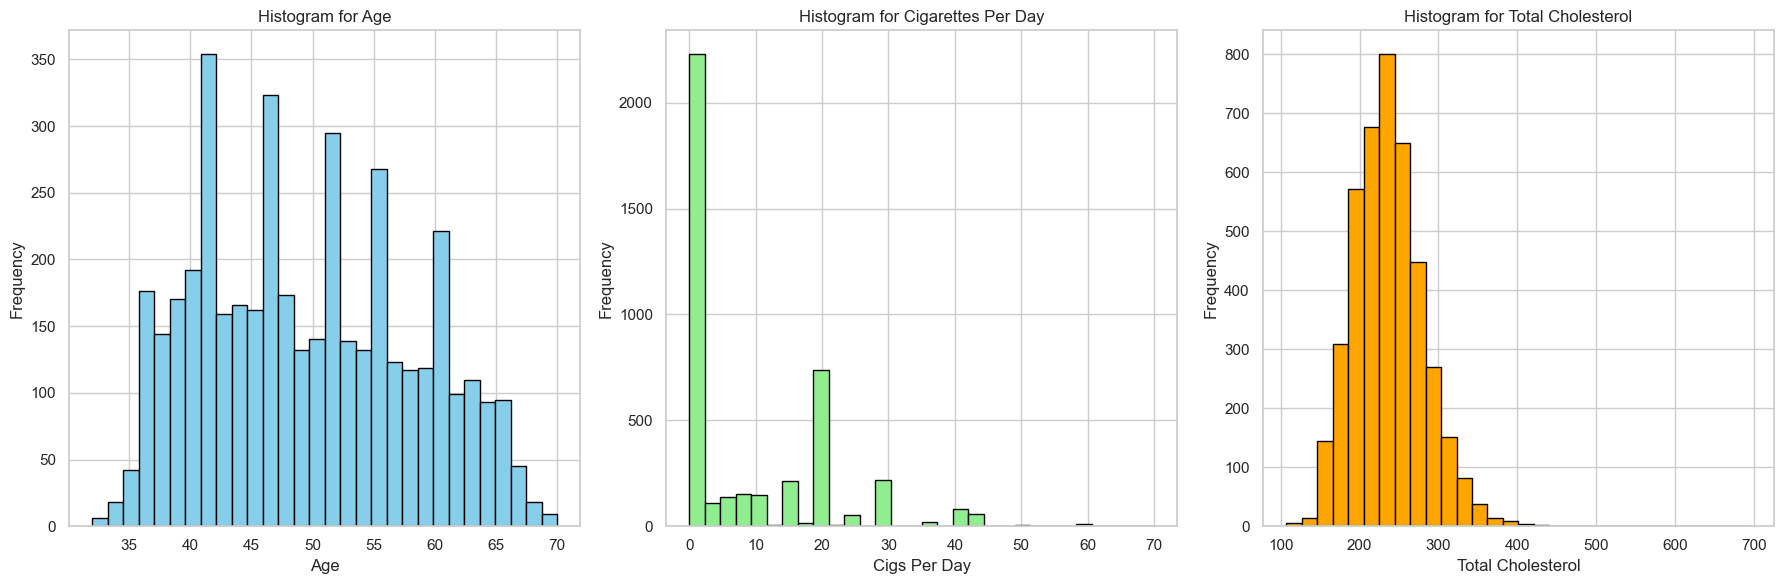

In [12]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram 1: Age
axes[0].hist(df['age'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram for Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Histogram 2: Cigarettes Per Day
axes[1].hist(df['cigsPerDay'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram for Cigarettes Per Day')
axes[1].set_xlabel('Cigs Per Day')
axes[1].set_ylabel('Frequency')

# Histogram 3: Total Cholesterol
axes[2].hist(df['totChol'], bins=30, color='orange', edgecolor='black')
axes[2].set_title('Histogram for Total Cholesterol')
axes[2].set_xlabel('Total Cholesterol')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


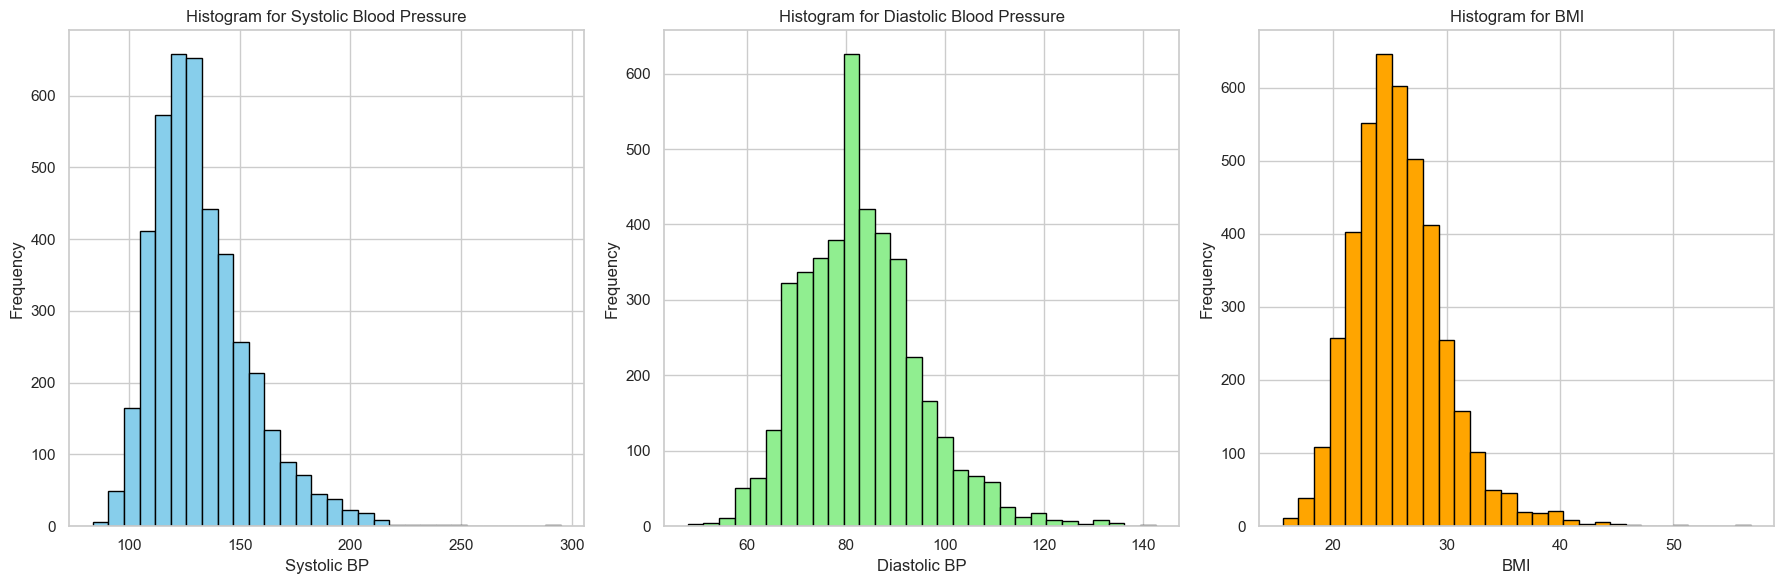

In [13]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram 4: Systolic Blood Pressure
axes[0].hist(df['sysBP'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram for Systolic Blood Pressure')
axes[0].set_xlabel('Systolic BP')
axes[0].set_ylabel('Frequency')

# Histogram 5: Diastolic Blood Pressure
axes[1].hist(df['diaBP'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram for Diastolic Blood Pressure')
axes[1].set_xlabel('Diastolic BP')
axes[1].set_ylabel('Frequency')

# Histogram 6: Body Mass Index
axes[2].hist(df['BMI'], bins=30, color='orange', edgecolor='black')
axes[2].set_title('Histogram for BMI')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


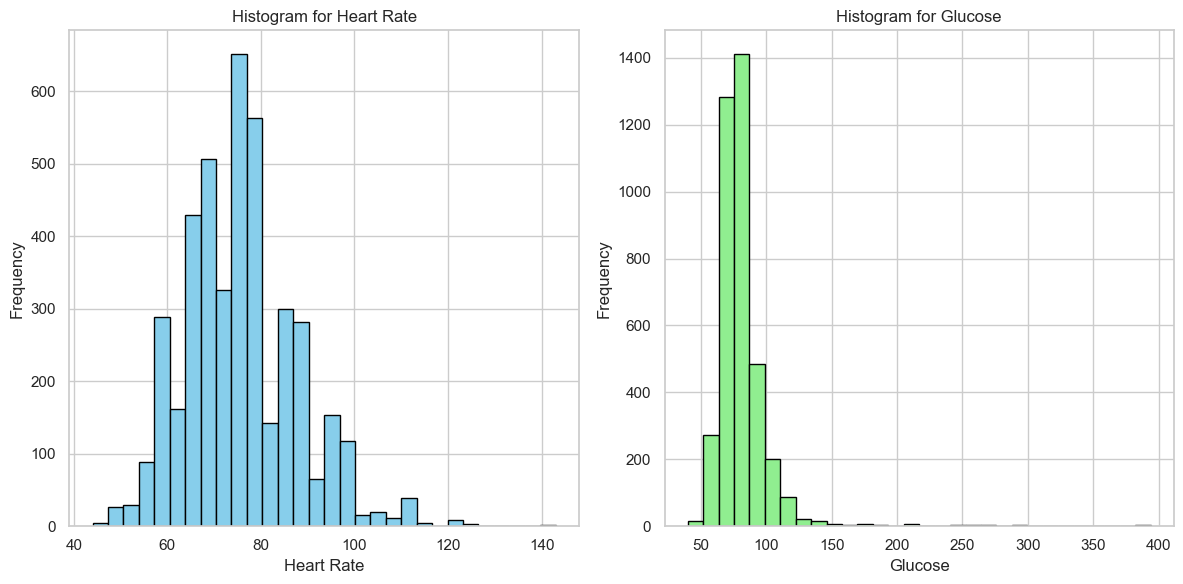

In [14]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram 7: Heart Rate
axes[0].hist(df['heartRate'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram for Heart Rate')
axes[0].set_xlabel('Heart Rate')
axes[0].set_ylabel('Frequency')

# Histogram 8: Glucose
axes[1].hist(df['glucose'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram for Glucose')
axes[1].set_xlabel('Glucose')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Heart rate exhibits an approximately symmetric, bell-shaped distribution, suggesting it is close to a normal distribution for most individuals.
    
Systolic blood pressure and BMI display near-normal distributions with mild right skewness.

Diastolic blood pressure and total cholesterol appear relatively symmetric and closer to a normal distribution.

Cigarettes per day shows a highly right-skewed distribution

The age distribution does not follow a normal pattern

# Scatter Plot:

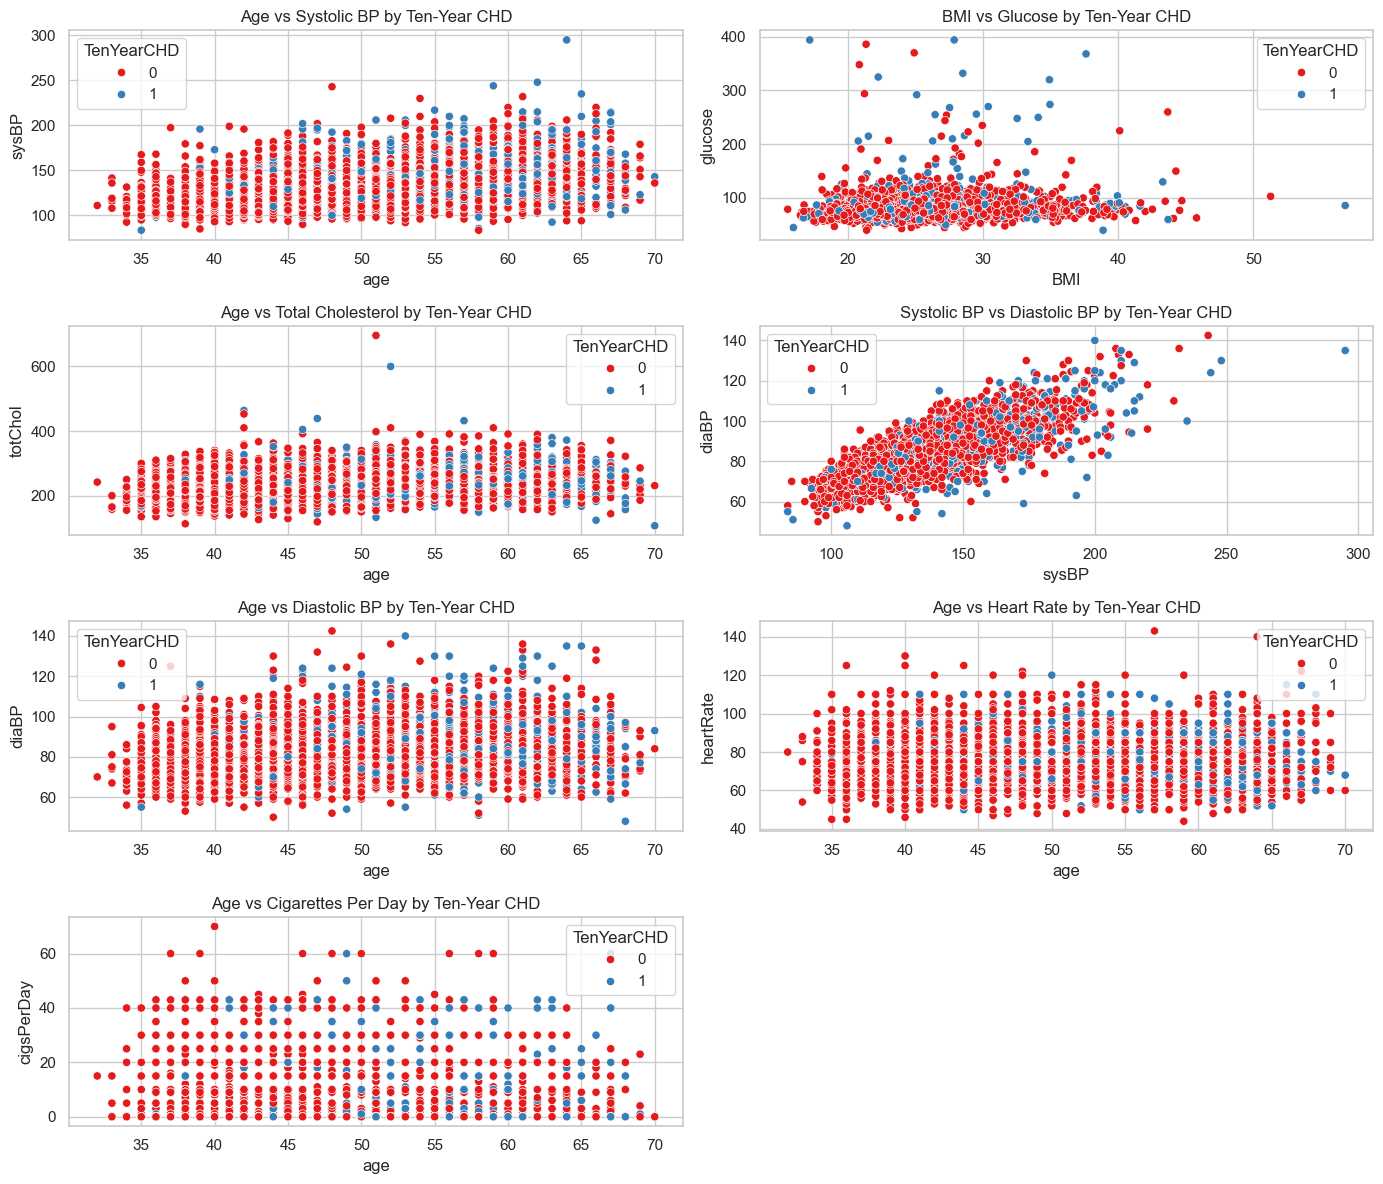

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(14, 12))

sns.scatterplot(x='age', y='sysBP', hue='TenYearCHD', data=df, ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title("Age vs Systolic BP by Ten-Year CHD")

sns.scatterplot(x='BMI', y='glucose', hue='TenYearCHD', data=df, ax=axes[0, 1], palette='Set1')
axes[0, 1].set_title("BMI vs Glucose by Ten-Year CHD")

sns.scatterplot(x='age', y='totChol', hue='TenYearCHD', data=df, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title("Age vs Total Cholesterol by Ten-Year CHD")

sns.scatterplot(x='sysBP', y='diaBP', hue='TenYearCHD', data=df, ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title("Systolic BP vs Diastolic BP by Ten-Year CHD")

sns.scatterplot(x='age', y='diaBP', hue='TenYearCHD', data=df, ax=axes[2, 0], palette='Set1')
axes[2, 0].set_title("Age vs Diastolic BP by Ten-Year CHD")

sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=df, ax=axes[2, 1], palette='Set1')
axes[2, 1].set_title("Age vs Heart Rate by Ten-Year CHD")

sns.scatterplot(x='age', y='cigsPerDay', hue='TenYearCHD', data=df, ax=axes[3, 0], palette='Set1')
axes[3, 0].set_title("Age vs Cigarettes Per Day by Ten-Year CHD")

# Remove unused subplot
fig.delaxes(axes[3, 1])

plt.tight_layout()
plt.show()


Overlap exists between CHD and non-CHD classes = +ve Association => As age increases, systolic blood pressure generally tends to rise.

relationship between BMI and glucose appears weak to moderate,
BMI alone does not show a strong linear relationship with glucose, individuals with higher glucose levels are more likely to experience coronary events.

Cholesterol levels shows a wide spread across all age groups

A strong positive correlation exists between systolic and diastolic blood pressure.

Systolic and diastolic blood pressure rise together, reflecting normal physiological behavior, Persons with high BP along with Hypertension gets affected by Coronary events.


# BOX PLOTS

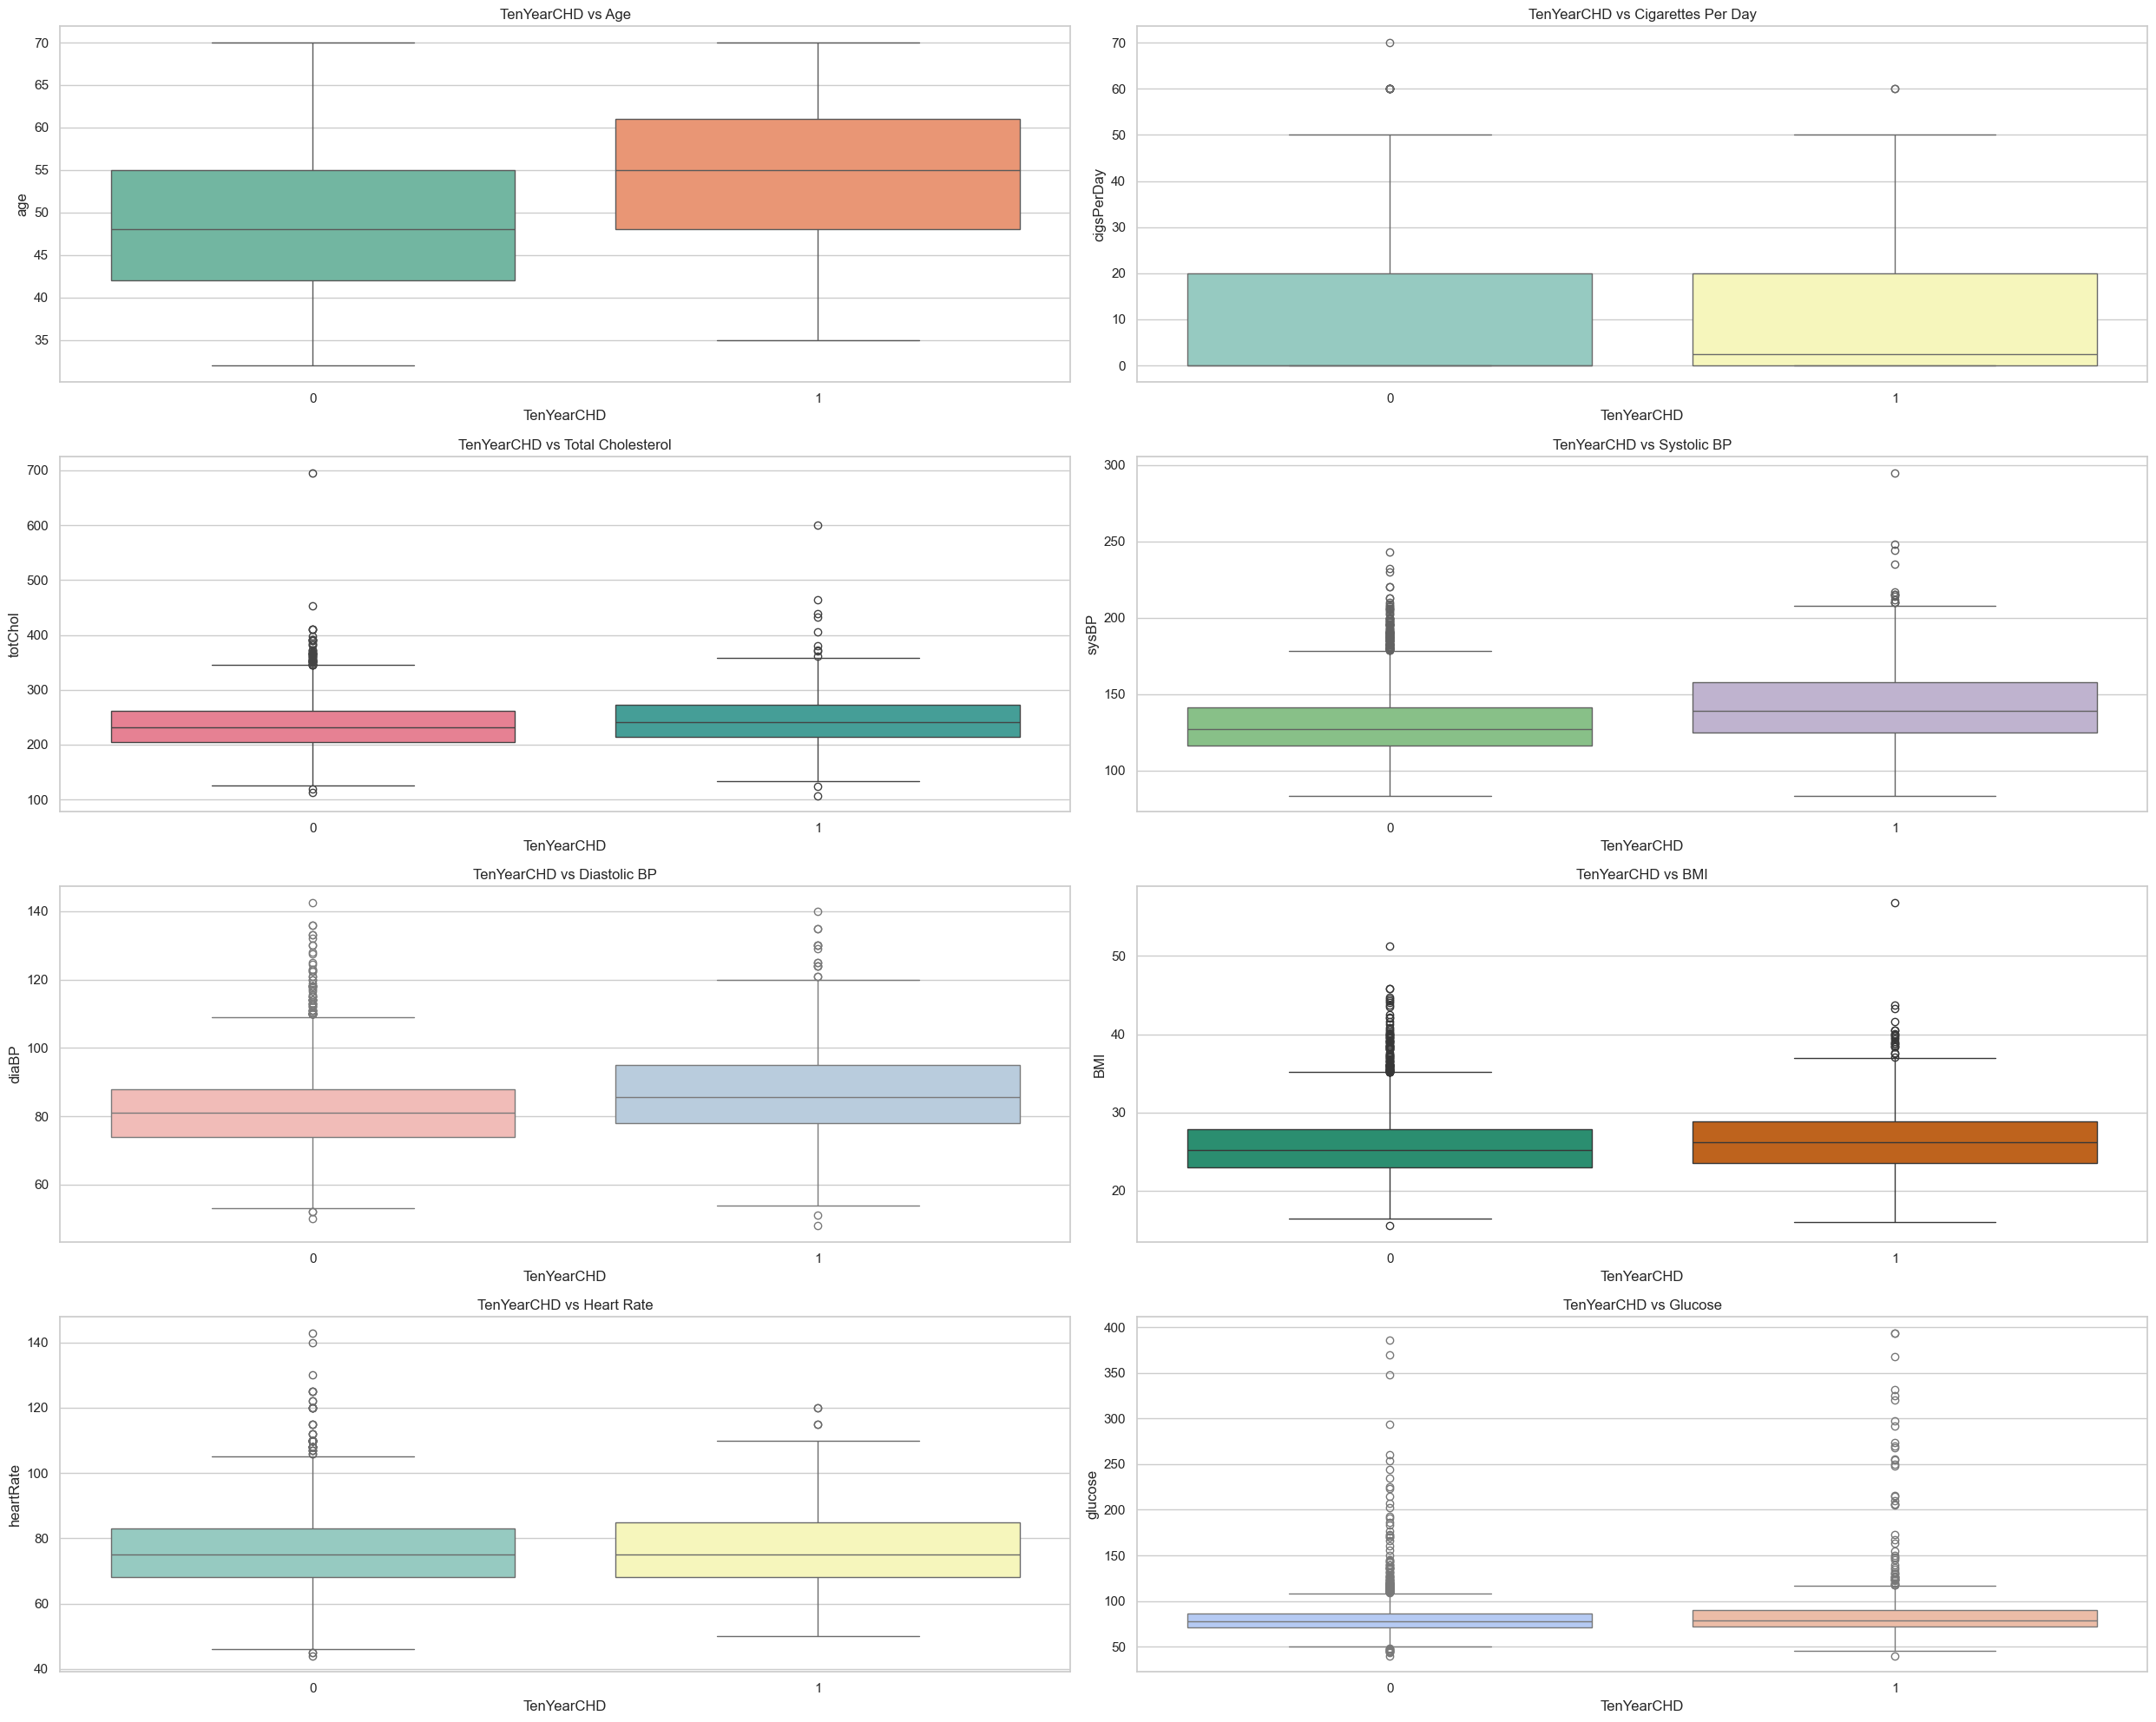

In [16]:
# Create 4x2 subplot grid for 8 boxplots
fig, axes = plt.subplots(4, 2, figsize=(25, 20))

# Flatten axes for easier indexing
axes = axes.flatten()

sns.boxplot(x='TenYearCHD', y='age', data=df, palette="Set2", ax=axes[0])
axes[0].set_title("TenYearCHD vs Age")

sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=df, palette="Set3", ax=axes[1])
axes[1].set_title("TenYearCHD vs Cigarettes Per Day")

sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette="husl", ax=axes[2])
axes[2].set_title("TenYearCHD vs Total Cholesterol")

sns.boxplot(x='TenYearCHD', y='sysBP', data=df, palette="Accent", ax=axes[3])
axes[3].set_title("TenYearCHD vs Systolic BP")

sns.boxplot(x='TenYearCHD', y='diaBP', data=df, palette="Pastel1", ax=axes[4])
axes[4].set_title("TenYearCHD vs Diastolic BP")

sns.boxplot(x='TenYearCHD', y='BMI', data=df, palette="Dark2", ax=axes[5])
axes[5].set_title("TenYearCHD vs BMI")

sns.boxplot(x='TenYearCHD', y='heartRate', data=df, palette="Set3", ax=axes[6])
axes[6].set_title("TenYearCHD vs Heart Rate")

sns.boxplot(x='TenYearCHD', y='glucose', data=df, palette="coolwarm", ax=axes[7])
axes[7].set_title("TenYearCHD vs Glucose")

plt.tight_layout()
plt.show()


**Age vs TenYearCHD**

median age for CHD = 1 > median age for CHD = 0

Individuals who experience a coronary heart disease event tend to be older. 
    
Age is therefore a strong and consistent risk factor for long-term coronary disease.

**Cigarettes Per Day vs TenYearCHD**

Outliers exist in both the classes.

Both classes have many individuals with low or zero cigarette use.

chain, frequent and heavy smoking is more commonly observed among those who develop coronary heart disease

**Total Cholesterol vs TenYearCHD**

median cholesterol level is slightly higher for CHD = 1.

Moderate Overlap and high outlier exist in both the classes.

**Systolic Blood Pressure vs TenYearCHD**

CHD = 1 has a higher median systolic BP.

Individuals who develop coronary heart disease tend to have higher systolic blood pressure.

**Diastolic Blood Pressure vs TenYearCHD**

The CHD = 1 group shows a slightly higher median diastolic BP

Diastolic blood pressure is modestly higher among individuals with coronary heart disease, it plays a supporting role in overall cardiovascular risk


**BMI vs TenYearCHD**

The median BMI is slightly higher for CHD = 1.

Higher BMI outliers are present in both groups.

Higher body mass index is associated with increased coronary risk, but the overlap indicates that BMI alone cannot reliably identify high-risk individuals

**Heart Rate vs TenYearCHD**

medians for both groups are very close.

Distributions largely overlap

**Glucose vs TenYearCHD**

CHD = 1 shows a slightly higher median glucose level.

More extreme glucose outliers appear among CHD cases.



# BIVARIATE

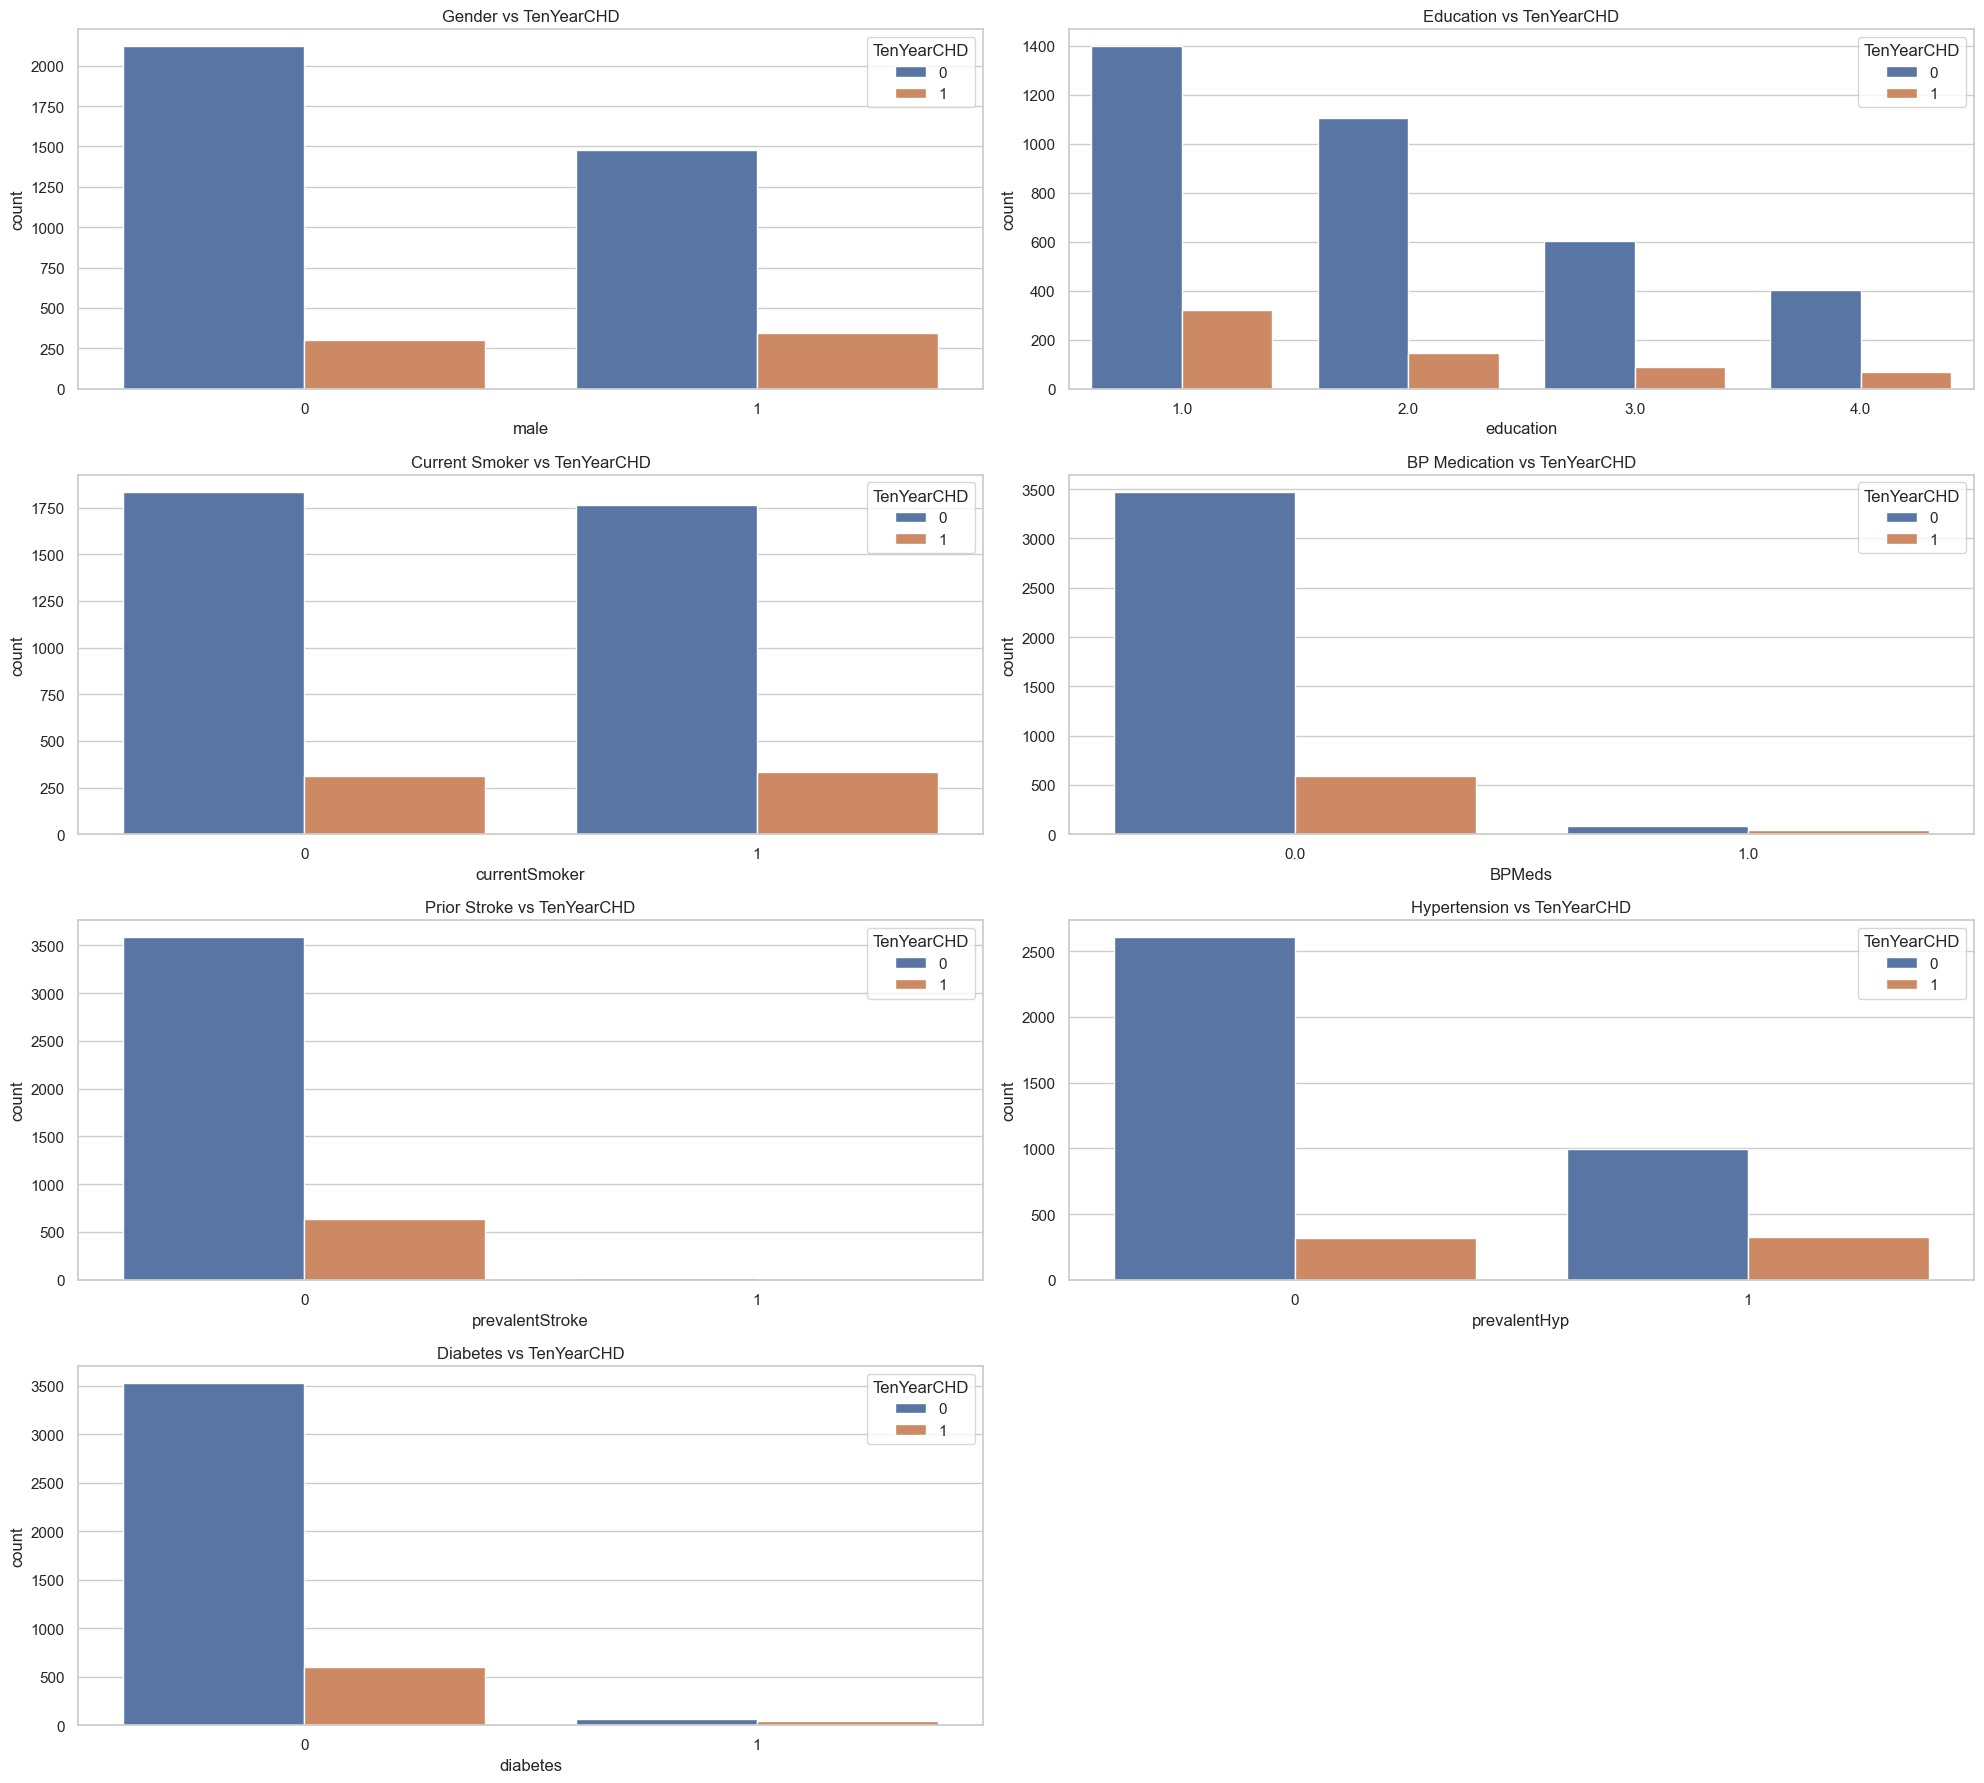

In [17]:
sns.set(style='whitegrid')

# Create subplots (4 rows, 2 columns) → 8 categorical variables
fig, axes = plt.subplots(4, 2, figsize=(20, 18))

# Plot 1: male vs TenYearCHD
sns.countplot(data=df, x='male', hue='TenYearCHD', ax=axes[0, 0])
axes[0, 0].set_title('Gender vs TenYearCHD')
axes[0, 0].set_xlabel('male')
axes[0, 0].set_ylabel('count')

# Plot 2: education vs TenYearCHD
sns.countplot(data=df, x='education', hue='TenYearCHD', ax=axes[0, 1])
axes[0, 1].set_title('Education vs TenYearCHD')
axes[0, 1].set_xlabel('education')
axes[0, 1].set_ylabel('count')

# Plot 3: currentSmoker vs TenYearCHD
sns.countplot(data=df, x='currentSmoker', hue='TenYearCHD', ax=axes[1, 0])
axes[1, 0].set_title('Current Smoker vs TenYearCHD')
axes[1, 0].set_xlabel('currentSmoker')
axes[1, 0].set_ylabel('count')

# Plot 4: BPMeds vs TenYearCHD
sns.countplot(data=df, x='BPMeds', hue='TenYearCHD', ax=axes[1, 1])
axes[1, 1].set_title('BP Medication vs TenYearCHD')
axes[1, 1].set_xlabel('BPMeds')
axes[1, 1].set_ylabel('count')

# Plot 5: prevalentStroke vs TenYearCHD
sns.countplot(data=df, x='prevalentStroke', hue='TenYearCHD', ax=axes[2, 0])
axes[2, 0].set_title('Prior Stroke vs TenYearCHD')
axes[2, 0].set_xlabel('prevalentStroke')
axes[2, 0].set_ylabel('count')

# Plot 6: prevalentHyp vs TenYearCHD
sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD', ax=axes[2, 1])
axes[2, 1].set_title('Hypertension vs TenYearCHD')
axes[2, 1].set_xlabel('prevalentHyp')
axes[2, 1].set_ylabel('count')

# Plot 7: diabetes vs TenYearCHD
sns.countplot(data=df, x='diabetes', hue='TenYearCHD', ax=axes[3, 0])
axes[3, 0].set_title('Diabetes vs TenYearCHD')
axes[3, 0].set_xlabel('diabetes')
axes[3, 0].set_ylabel('count')

axes[3, 1].axis('off')
#fig.delaxes(axes[3, 1])


plt.tight_layout()
plt.show()


**Strong Categorical Predictors**

1) Hypertension
2) BP Medication
3) Diabetes


**Gender (male vs TenYearCHD)**

Males show a higher proportion of CHD cases compared to females.
    
1) Being male is associated with increased coronary risk.

2) Gender is a useful but not sufficient predictor.

**Education vs TenYearCHDEducation vs TenYearCHD**

Lower education levels show higher counts and proportions of CHD events.

CHD occurrence decreases as education level increases.

1) Education may act as a proxy for lifestyle, awareness, and healthcare access.

2) Shows a clear gradient, making it an informative feature.

**Current Smoker vs TenYearCHD**

Smokers show a slightly higher proportion of CHD events.

Non-smokers still have CHD cases, but at a lower rate.

1) Smoking increases coronary risk, but not all smokers develop CHD.

2) Important risk-enhancing feature, not a standalone predictor.


**BP Medication (BPMeds) vs TenYearCHD**

Individuals on BP medication show a much higher proportion of CHD events.

Very few people are on medication, but risk is concentrated there.

1) Medication indicates pre-existing hypertension.

2) Strong risk signal, but low frequency.


**Hypertension (prevalentHyp) vs TenYearCHD**

Individuals with a prior history of stroke are very rare in the dataset

Individuals with hypertension show clearly higher CHD proportions - Difference is clearly visible.



**Diabetes vs TenYearCHD**

Though the Counts for Diabetic patients to get CHD is low when compared with non-diabetic, But the proportion of diabetes person getting CHD is High, 


**Linear, KNN, NB, SVM**
distance-based

scale-sensitive

Can be affected by encoding choices

1) type handling
2) Scaling
3) Imputation

**Tree-based Models**
Do not care about scale

Do not compute distances

Can handle ordinal numeric features well

So they only need:

1) Missing value handling (imputation)

2) No scaling

3) No forced encoding


To ensure a comprehensive evaluation, both statistical and ensemble-based classification models were explored. Linear and probabilistic models capture global trends and offer interpretability, while tree-based and boosting models capture non-linear interactions and complex risk patterns. K-fold cross-validation was employed to fairly compare model performance and identify the most reliable approach for long-term coronary risk prediction.

# Modelling

In [18]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, recall_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
from sklearn.model_selection import train_test_split

target = "TenYearCHD"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# EXCTRACTING NUMERIC & NOMINAL FEATURES

In [21]:
num_features = [
    "age", "education", "cigsPerDay", "totChol",
    "sysBP", "diaBP", "BMI", "heartRate", "glucose"
]

nominal_features = [
    "male", "currentSmoker", "prevalentStroke",
    "prevalentHyp", "diabetes", "BPMeds"
]

# CREATING NUMERIC & CATEGORICAL TRANSFORMER

In [22]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, nominal_features)
    ]
)

# LOGISTIC REGRESSION

Logistic Regression Results
Train Accuracy: 0.6768867924528302
Test Accuracy : 0.6698113207547169

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       719
           1       0.25      0.60      0.35       129

    accuracy                           0.67       848
   macro avg       0.58      0.64      0.57       848
weighted avg       0.81      0.67      0.71       848



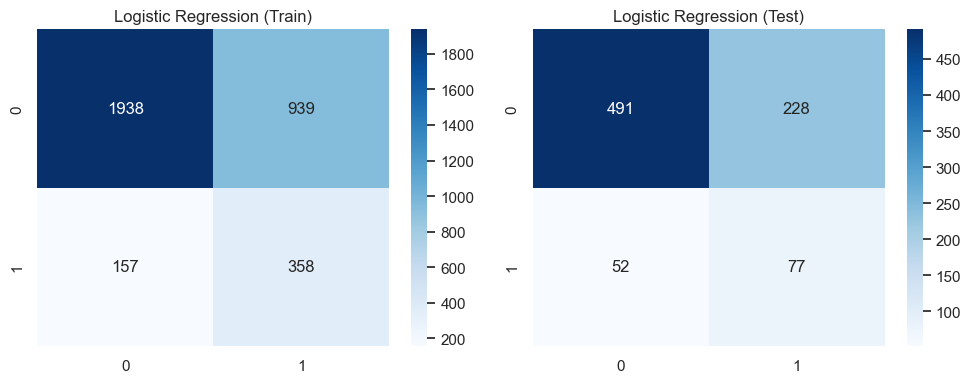

In [23]:
log_reg = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)

lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", log_reg)
])

lr_pipeline.fit(X_train, y_train)

y_train_pred_lr = lr_pipeline.predict(X_train)
y_test_pred_lr  = lr_pipeline.predict(X_test)

print("Logistic Regression Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_lr))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_lr))


fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression (Train)')
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression (Test)')

plt.tight_layout()
plt.show()


# KNN

KNN Results
Train Accuracy: 1.0
Test Accuracy : 0.8408018867924528

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       719
           1       0.36      0.06      0.11       129

    accuracy                           0.84       848
   macro avg       0.61      0.52      0.51       848
weighted avg       0.78      0.84      0.79       848



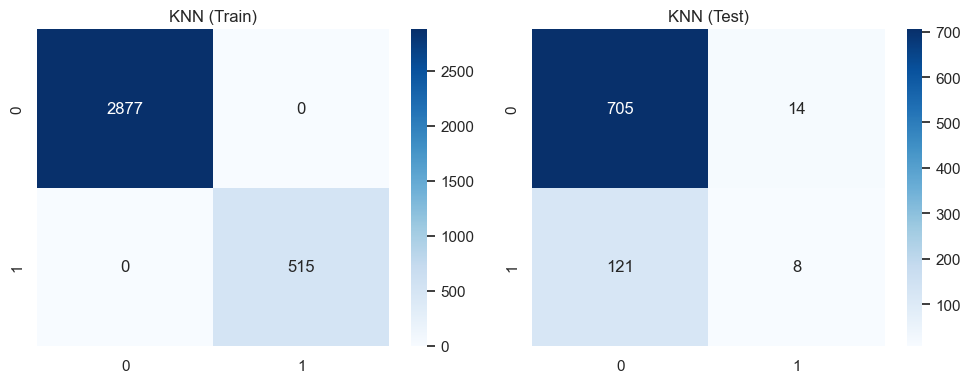

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance"
)


knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", knn_model)
])


knn_pipeline.fit(X_train, y_train)


y_train_pred_knn = knn_pipeline.predict(X_train)
y_test_pred_knn  = knn_pipeline.predict(X_test)


print("KNN Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_knn))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_knn))


print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_knn))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('KNN (Train)')

sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('KNN (Test)')

plt.tight_layout()
plt.show()

# NB

Naive Bayes Results
Train Accuracy: 0.8290094339622641
Test Accuracy : 0.8054245283018868
Recall (CHD = 1): 0.13953488372093023
F1-score (CHD = 1): 0.1791044776119403


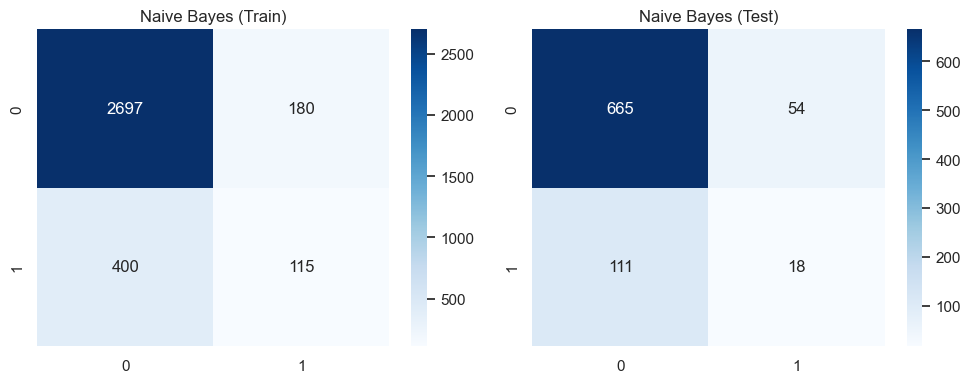

In [25]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", nb_model)
])

nb_pipeline.fit(X_train, y_train)

y_train_pred_nb = nb_pipeline.predict(X_train)
y_test_pred_nb  = nb_pipeline.predict(X_test)

print("Naive Bayes Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_nb))


print("Recall (CHD = 1):", recall_score(y_test, y_test_pred_nb))
print("F1-score (CHD = 1):", f1_score(y_test, y_test_pred_nb))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes (Train)')

sns.heatmap(confusion_matrix(y_test, y_test_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Naive Bayes (Test)')

plt.tight_layout()
plt.show()


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

all_features = X.columns.tolist()

dt_imputer = ColumnTransformer(transformers=[
        ("imputer", SimpleImputer(strategy="median"), all_features)]
)

Train Accuracy: 1.0
Test Accuracy : 0.7488207547169812
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       719
           1       0.20      0.21      0.20       129

    accuracy                           0.75       848
   macro avg       0.53      0.53      0.53       848
weighted avg       0.76      0.75      0.75       848



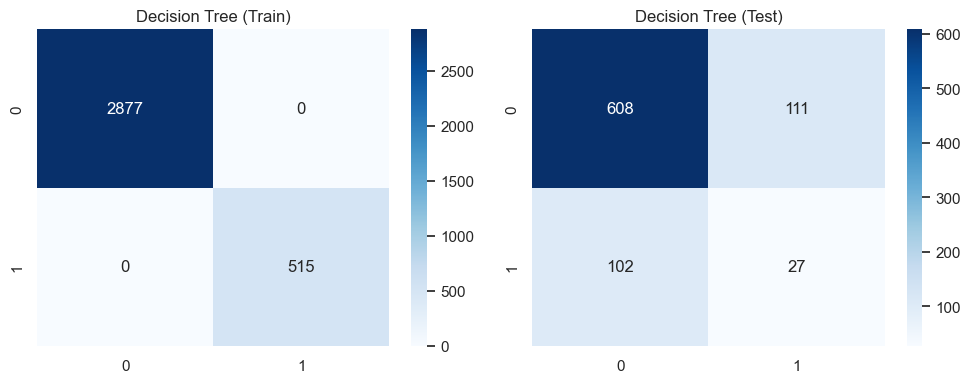

Recall: 0.20930232558139536
F1-score: 0.20224719101123595


In [27]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_pipeline = Pipeline([
    ("imputer", dt_imputer),
    ("model", dt_model)
])

dt_pipeline.fit(X_train, y_train)

y_train_pred_dt = dt_pipeline.predict(X_train)
y_test_pred_dt  = dt_pipeline.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_dt))

print(classification_report(y_test, y_test_pred_dt))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_dt), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Decision Tree (Test)")
plt.tight_layout()
plt.show()


print("Recall:", recall_score(y_test, y_test_pred_dt))
print("F1-score:", f1_score(y_test, y_test_pred_dt))


**Since ensemble tree-based models inherit the properties of decision trees, the same imputation-only preprocessing pipeline was reused across all ensemble methods.**

# BAGGING

Bagging (Decision Tree)
Train Accuracy: 1.0
Test Accuracy : 0.839622641509434

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       719
           1       0.36      0.07      0.12       129

    accuracy                           0.84       848
   macro avg       0.61      0.52      0.51       848
weighted avg       0.78      0.84      0.79       848



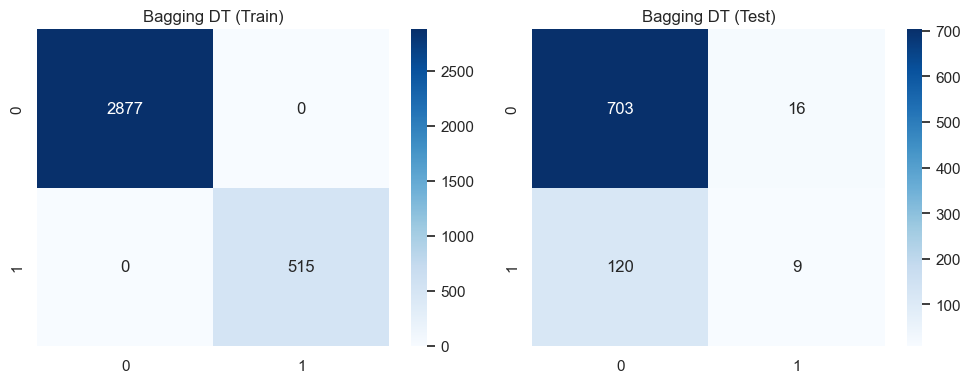

Recall (CHD = 1): 0.06976744186046512
F1-score (CHD = 1): 0.11688311688311688


In [30]:
from sklearn.ensemble import BaggingClassifier

en_preprocessor = ColumnTransformer(
    [("imputer", SimpleImputer(strategy="median"), X.columns)],
    remainder="drop"
)

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

bag_pipeline = Pipeline([
    ("preprocess", en_preprocessor),
    ("model", bag_model)
])

bag_pipeline.fit(X_train, y_train)

y_train_pred_bag = bag_pipeline.predict(X_train)
y_test_pred_bag  = bag_pipeline.predict(X_test)

print("Bagging (Decision Tree)")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_bag))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_bag))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_bag))

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_bag), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Bagging DT (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_bag), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Bagging DT (Test)")

plt.tight_layout()
plt.show()

print("Recall (CHD = 1):", recall_score(y_test, y_test_pred_bag))
print("F1-score (CHD = 1):", f1_score(y_test, y_test_pred_bag))

# AdaBoost 

AdaBoost (Decision Stumps)
Train Accuracy: 0.8508254716981132
Test Accuracy : 0.8502358490566038

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       1.00      0.02      0.03       129

    accuracy                           0.85       848
   macro avg       0.92      0.51      0.47       848
weighted avg       0.87      0.85      0.78       848



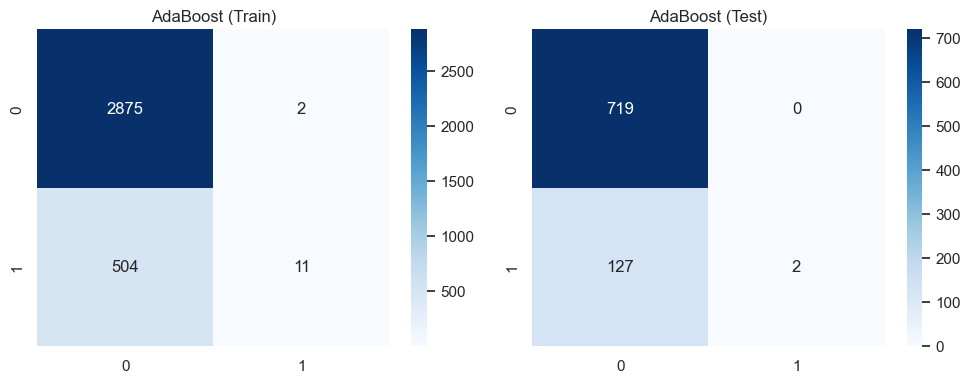

Recall (CHD = 1): 0.015503875968992248
F1-score (CHD = 1): 0.030534351145038167


In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada_base = DecisionTreeClassifier(
    max_depth=1,
    random_state=42
)

ada_model = AdaBoostClassifier(
    estimator=ada_base,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada_pipeline = Pipeline([
    ("preprocess", en_preprocessor),
    ("model", ada_model)
])

ada_pipeline.fit(X_train, y_train)

y_train_pred_ada = ada_pipeline.predict(X_train)
y_test_pred_ada  = ada_pipeline.predict(X_test)

print("AdaBoost (Decision Stumps)")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_ada))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_ada))


print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_ada))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_ada),annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("AdaBoost (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_ada),annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("AdaBoost (Test)")

plt.tight_layout()
plt.show()

print("Recall (CHD = 1):", recall_score(y_test, y_test_pred_ada))
print("F1-score (CHD = 1):", f1_score(y_test, y_test_pred_ada))

# Random Forest

**AdaBoost combines multiple weak learners (decision stumps) to iteratively focus on misclassified CHD cases, improving minority class detection compared to a single tree.**

Random Forest Results
Train Accuracy: 1.0
Test Accuracy : 0.847877358490566

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.50      0.04      0.07       129

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.49       848
weighted avg       0.80      0.85      0.79       848



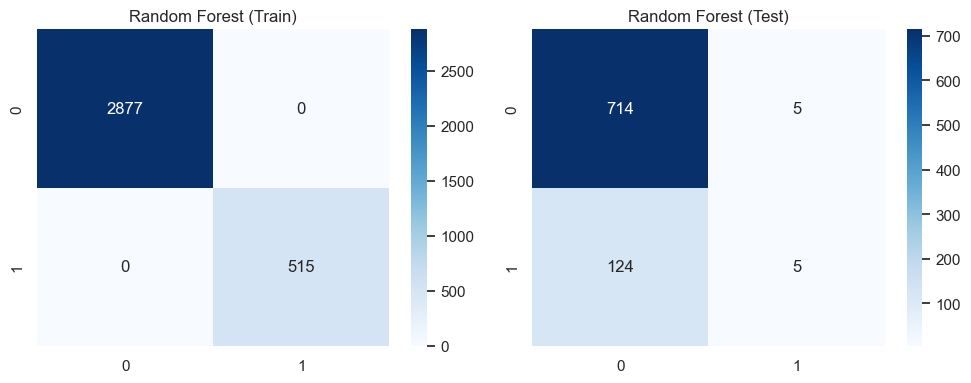

Recall (CHD = 1): 0.03875968992248062
F1-score (CHD = 1): 0.07194244604316546


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline([
    ("preprocess", en_preprocessor),
    ("model", rf_model)
])

rf_pipeline.fit(X_train, y_train)

y_train_pred_rf = rf_pipeline.predict(X_train)
y_test_pred_rf  = rf_pipeline.predict(X_test)

print("Random Forest Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_rf))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_rf))

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_rf), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_rf), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest (Test)")

plt.tight_layout()
plt.show()

print("Recall (CHD = 1):", recall_score(y_test, y_test_pred_rf))
print("F1-score (CHD = 1):", f1_score(y_test, y_test_pred_rf))

**Random Forest reduces variance by averaging multiple decision trees trained on bootstrapped samples and random feature subsets, leading to improved generalization compared to a single tree.**

# Extra Trees

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

et_model = ExtraTreesClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

et_pipeline = Pipeline([
    ("preprocess", en_preprocessor),
    ("model", et_model)
])

et_pipeline.fit(X_train, y_train)

y_train_pred_et = et_pipeline.predict(X_train)
y_test_pred_et  = et_pipeline.predict(X_test)

print("Extra Trees Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_et))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_et))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_et))

sns.heatmap(confusion_matrix(y_train, y_train_pred_et), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Extra Trees (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_et), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Extra Trees (Test)")

plt.tight_layout()
plt.show()

print("Recall (CHD = 1):", recall_score(y_test, y_test_pred_et))
print("F1-score (CHD = 1):", f1_score(y_test, y_test_pred_et))

Extra Trees Results
Train Accuracy: 1.0
Test Accuracy : 0.8443396226415094

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.38      0.04      0.07       129

    accuracy                           0.84       848
   macro avg       0.62      0.51      0.49       848
weighted avg       0.78      0.84      0.79       848



<Figure size 640x480 with 0 Axes>

Recall (CHD = 1): 0.03875968992248062
F1-score (CHD = 1): 0.07042253521126761


# Gradient Boosting

Gradient Boosting Results
Train Accuracy: 0.8841391509433962
Test Accuracy : 0.8372641509433962

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       719
           1       0.34      0.08      0.13       129

    accuracy                           0.84       848
   macro avg       0.60      0.53      0.52       848
weighted avg       0.78      0.84      0.79       848



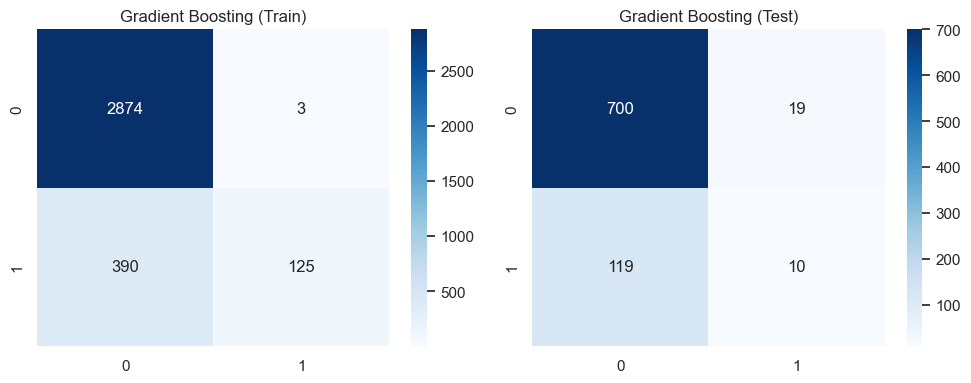

Recall (CHD = 1): 0.07751937984496124
F1-score (CHD = 1): 0.12658227848101267


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_pipeline = Pipeline([
    ("preprocess", en_preprocessor),
    ("model", gb_model)
])

gb_pipeline.fit(X_train, y_train)

y_train_pred_gb = gb_pipeline.predict(X_train)
y_test_pred_gb  = gb_pipeline.predict(X_test)

print("Gradient Boosting Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_gb))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_gb))

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_gb), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Gradient Boosting (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_gb), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Gradient Boosting (Test)")

plt.tight_layout()
plt.show()

print("Recall (CHD = 1):", recall_score(y_test, y_test_pred_gb))
print("F1-score (CHD = 1):", f1_score(y_test, y_test_pred_gb))

**Gradient Boosting sequentially corrects previous errors, enabling stronger learning of complex feature interactions and improved detection of CHD cases.**

# VOTING CLASSIFIER

Voting Classifier Results
Train Accuracy: 0.8829599056603774
Test Accuracy : 0.8360849056603774

Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       719
           1       0.34      0.09      0.14       129

    accuracy                           0.84       848
   macro avg       0.60      0.53      0.52       848
weighted avg       0.78      0.84      0.79       848



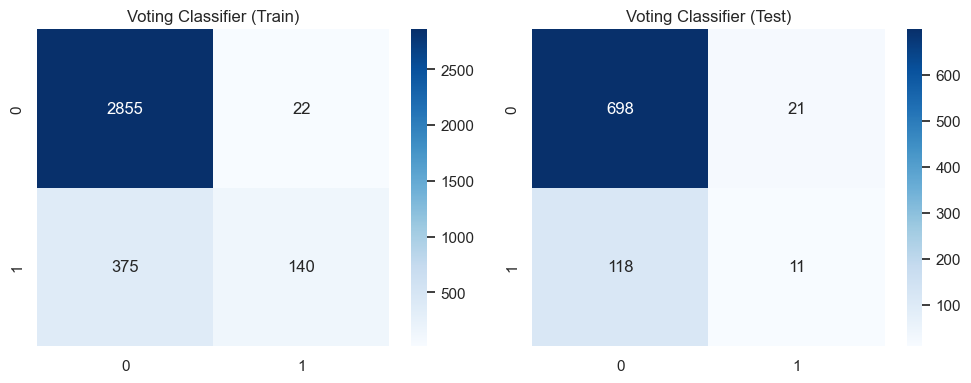

In [35]:
from sklearn.ensemble import VotingClassifier


dt_pipeline_1 = Pipeline([
    ("preprocess", en_preprocessor),
    ("model", DecisionTreeClassifier(
        criterion="gini",
        max_depth=3,
        random_state=42
    ))
])


dt_pipeline_1 = Pipeline([
    ("preprocess", en_preprocessor),
    ("model", DecisionTreeClassifier(
        criterion="gini",
        max_depth=3,
        random_state=42
    ))
])


dt_pipeline_2 = Pipeline([
    ("preprocess", en_preprocessor),
    ("model", DecisionTreeClassifier(
        criterion="gini",
        max_depth=5,
        random_state=42
    ))
])


dt_pipeline_3 = Pipeline([
    ("preprocess", en_preprocessor),
    ("model", DecisionTreeClassifier(
        criterion="entropy",
        max_depth=4,
        random_state=42
    ))
])


voting_clf = VotingClassifier(
    estimators=[
        ("lr", lr_pipeline),
        ("knn", knn_pipeline),
        ("nb", nb_pipeline),
        ("dt_gini_3", dt_pipeline_1),
        ("dt_gini_5", dt_pipeline_2),
        ("dt_entropy_4", dt_pipeline_3)
    ],
    voting="soft"
)

voting_clf.fit(X_train, y_train)

y_train_pred_vc = voting_clf.predict(X_train)
y_test_pred_vc  = voting_clf.predict(X_test)

print("Voting Classifier Results")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_vc))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_vc))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_vc))


fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_train, y_train_pred_vc), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Voting Classifier (Train)")

sns.heatmap(confusion_matrix(y_test, y_test_pred_vc), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Voting Classifier (Test)")

plt.tight_layout()
plt.show()



# K FOLD CV

In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)



models = {
    "Logistic Regression (Balanced)": lr_pipeline,
    "KNN": knn_pipeline,
    "Naive Bayes": nb_pipeline,

    "Decision Tree (Gini, depth=3)": dt_pipeline_1,

    "Bagging (Decision Tree)": bag_pipeline,
    "AdaBoost (Decision Stumps)": ada_pipeline,
    "Random Forest": rf_pipeline,
    "Extra Trees": et_pipeline,
    "Gradient Boosting": gb_pipeline,

    "Voting Classifier": voting_clf
}



cv_results = []

for model_name, pipeline in models.items():

    # Cross-validated F1 score (positive class = CHD = 1)
    cv_f1_scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="f1",
        n_jobs=-1
    )

    # Fit model on full training data
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred  = pipeline.predict(X_test)

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy  = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1  = f1_score(y_test, y_test_pred)

    cv_results.append({
        "Model": model_name,
        "Mean CV F1": cv_f1_scores.mean(),
        "Std CV F1": cv_f1_scores.std(),
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train F1": train_f1,
        "Test F1": test_f1
    })


cv_summary = (
    pd.DataFrame(cv_results)
    .sort_values(by="Mean CV F1", ascending=False)
)

pd.set_option("display.float_format", lambda x: f"{x:.4f}")
display(cv_summary)

,Model,Mean CV F1,Std CV F1,Train Accuracy,Test Accuracy,Train F1,Test F1
0,Logistic Regression (Balanced),0.3931,0.0305,0.6769,0.6698,0.3951,0.3548
2,Naive Bayes,0.2855,0.0266,0.8290,0.8054,0.2840,0.1791
9,Voting Classifier,0.2010,0.0405,0.8830,0.8361,0.4136,0.1366
8,Gradient Boosting,0.1943,0.0565,0.8841,0.8373,0.3888,0.1266
4,Bagging (Decision Tree),0.1815,0.0238,1.0000,0.8396,1.0000,0.1169
1,KNN,0.1504,0.0420,1.0000,0.8408,1.0000,0.1060
7,Extra Trees,0.1372,0.0224,1.0000,0.8443,1.0000,0.0704
6,Random Forest,0.1092,0.0394,1.0000,0.8479,1.0000,0.0719
3,"Decision Tree (Gini, depth=3)",0.0882,0.0214,0.8535,0.8337,0.2148,0.1132
5,AdaBoost (Decision Stumps),0.0302,0.0190,0.8508,0.8502,0.0417,0.0305


In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

models = {
    "Logistic Regression (Balanced)": lr_pipeline,
    "KNN": knn_pipeline,
    "Naive Bayes": nb_pipeline,
    "Decision Tree (Gini, depth=3)": dt_pipeline_1,
    "Bagging (Decision Tree)": bag_pipeline,
    "AdaBoost (Decision Stumps)": ada_pipeline,
    "Random Forest": rf_pipeline,
    "Extra Trees": et_pipeline,
    "Gradient Boosting": gb_pipeline,
    "Voting Classifier": voting_clf
}

cv_results = []

for model_name, pipeline in models.items():

    # CROSS-VALIDATED ACCURACY (THIS IS THE FIX)
    cv_acc_scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )

    # Fit model on full training data
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred  = pipeline.predict(X_test)

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy  = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1  = f1_score(y_test, y_test_pred)

    cv_results.append({
        "Model": model_name,
        "Mean CV Accuracy": cv_acc_scores.mean(),
        "Std CV Accuracy": cv_acc_scores.std(),
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train F1": train_f1,
        "Test F1": test_f1
    })

cv_summary = (
    pd.DataFrame(cv_results)
    .sort_values(by="Mean CV Accuracy", ascending=False)
)

pd.set_option("display.float_format", lambda x: f"{x:.4f}")
display(cv_summary)


,Model,Mean CV Accuracy,Std CV Accuracy,Train Accuracy,Test Accuracy,Train F1,Test F1
5,AdaBoost (Decision Stumps),0.8494,0.0018,0.8508,0.8502,0.0417,0.0305
7,Extra Trees,0.8485,0.0048,1.0000,0.8443,1.0000,0.0704
8,Gradient Boosting,0.8482,0.0074,0.8841,0.8373,0.3888,0.1266
6,Random Forest,0.8479,0.0036,1.0000,0.8479,1.0000,0.0719
4,Bagging (Decision Tree),0.8464,0.0043,1.0000,0.8396,1.0000,0.1169
9,Voting Classifier,0.8464,0.0063,0.8830,0.8361,0.4136,0.1366
3,"Decision Tree (Gini, depth=3)",0.8435,0.0061,0.8535,0.8337,0.2148,0.1132
1,KNN,0.8361,0.0066,1.0000,0.8408,1.0000,0.1060
2,Naive Bayes,0.8296,0.0079,0.8290,0.8054,0.2840,0.1791
0,Logistic Regression (Balanced),0.6754,0.0283,0.6769,0.6698,0.3951,0.3548


# SMOTE

In [38]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [39]:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

In [40]:
preprocessor_stats = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, nominal_features)
    ]
)

In [41]:
preprocessor_tree = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_features + nominal_features)
    ]
)

Logistic Regression + SMOTE
Train Accuracy: 0.6701061320754716
Test Accuracy : 0.6591981132075472

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      2877
           1       0.27      0.69      0.39       515

    accuracy                           0.67      3392
   macro avg       0.60      0.68      0.58      3392
weighted avg       0.82      0.67      0.72      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       719
           1       0.25      0.60      0.35       129

    accuracy                           0.66       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.80      0.66      0.71       848



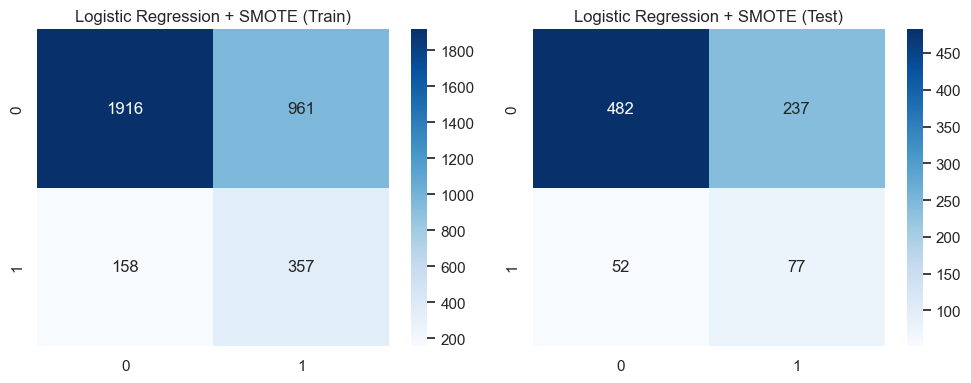

In [42]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
                                                          # Scaling needs to done before smoting
lr_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_stats),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(
        class_weight="balanced",            # either use class weights = balanced or SMOTE
        max_iter=1000,
        random_state=42
    ))
])


lr_smote_pipeline.fit(X_train, y_train)

y_train_pred_lr_smote = lr_smote_pipeline.predict(X_train)
y_test_pred_lr_smote  = lr_smote_pipeline.predict(X_test)


print("Logistic Regression + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lr_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_lr_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train,y_train_pred_lr_smote))
print("\nClassification Report (Test Set)")
print(classification_report(y_test,y_test_pred_lr_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_lr_smote),annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr_smote),annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Logistic Regression + SMOTE (Test)")
plt.tight_layout()
plt.show()


In [43]:
# KNN + SMOTE

KNN + SMOTE
Train Accuracy: 1.0
Test Accuracy : 0.6202830188679245

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2877
           1       1.00      1.00      1.00       515

    accuracy                           1.00      3392
   macro avg       1.00      1.00      1.00      3392
weighted avg       1.00      1.00      1.00      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.87      0.65      0.74       719
           1       0.18      0.43      0.26       129

    accuracy                           0.62       848
   macro avg       0.52      0.54      0.50       848
weighted avg       0.76      0.62      0.67       848



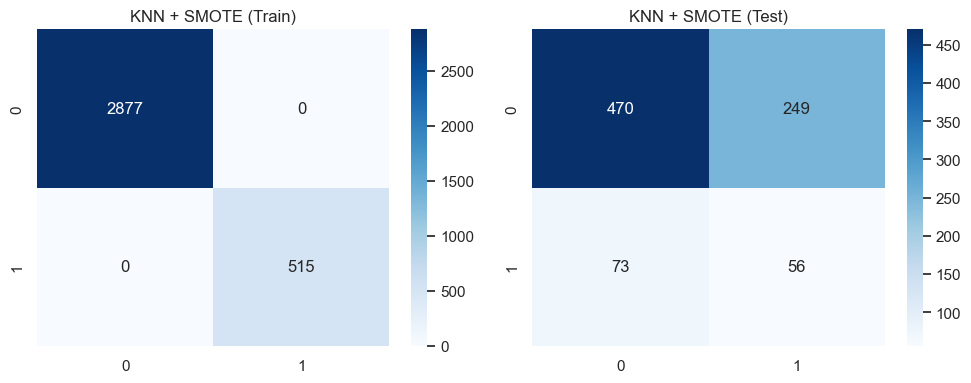

In [44]:
knn_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_stats),
    ("smote", SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(
        n_neighbors=5,
        weights="distance"
    ))
])

knn_smote_pipeline.fit(X_train, y_train)

y_train_pred_knn_smote = knn_smote_pipeline.predict(X_train)
y_test_pred_knn_smote  = knn_smote_pipeline.predict(X_test)

print("KNN + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_knn_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_knn_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_knn_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_knn_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_knn_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("KNN + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("KNN + SMOTE (Test)")
plt.tight_layout()
plt.show()

**KNN + SMOTE overfits because KNN memorizes synthetic minority samples created by SMOTE, leading to perfect training accuracy but poor generalization**

# Naive Bayes

Naive Bayes + SMOTE
Train Accuracy: 0.7959905660377359
Test Accuracy : 0.7712264150943396

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2877
           1       0.34      0.36      0.35       515

    accuracy                           0.80      3392
   macro avg       0.61      0.62      0.61      3392
weighted avg       0.80      0.80      0.80      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       719
           1       0.26      0.28      0.27       129

    accuracy                           0.77       848
   macro avg       0.57      0.57      0.57       848
weighted avg       0.78      0.77      0.77       848



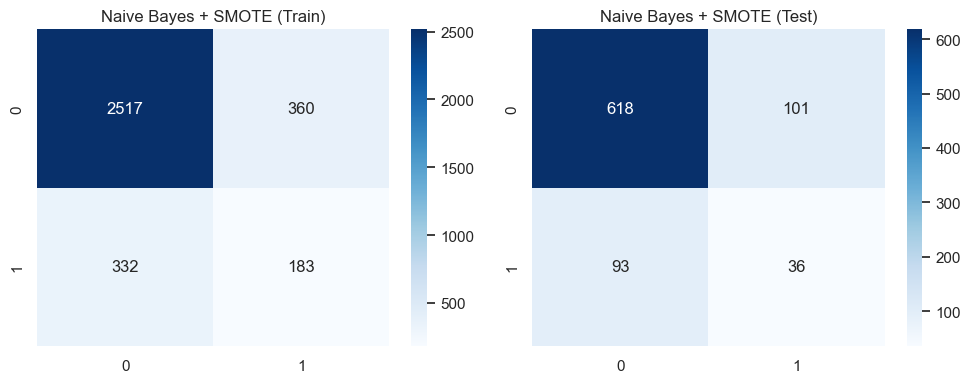

In [45]:
nb_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_stats),
    ("smote", SMOTE(random_state=42)),
    ("model", GaussianNB())
])


nb_smote_pipeline.fit(X_train, y_train)

y_train_pred_nb_smote = nb_smote_pipeline.predict(X_train)
y_test_pred_nb_smote  = nb_smote_pipeline.predict(X_test)

print("Naive Bayes + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_nb_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_nb_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_nb_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_nb_smote))


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_nb_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Naive Bayes + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_nb_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Naive Bayes + SMOTE (Test)")
plt.tight_layout()
plt.show()

**Applying SMOTE significantly improves minority class recall and F1-score for Naive Bayes by balancing class distribution. However, due to Naive Bayes’ strong independence assumptions, overall accuracy slightly decreases, indicating a precision–recall trade-off typical in imbalanced classification**

# Decision Tree

Decision Tree + SMOTE
Train Accuracy: 0.6583136792452831
Test Accuracy : 0.660377358490566

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      2877
           1       0.26      0.68      0.38       515

    accuracy                           0.66      3392
   macro avg       0.59      0.67      0.57      3392
weighted avg       0.82      0.66      0.71      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       719
           1       0.25      0.63      0.36       129

    accuracy                           0.66       848
   macro avg       0.58      0.65      0.56       848
weighted avg       0.81      0.66      0.71       848



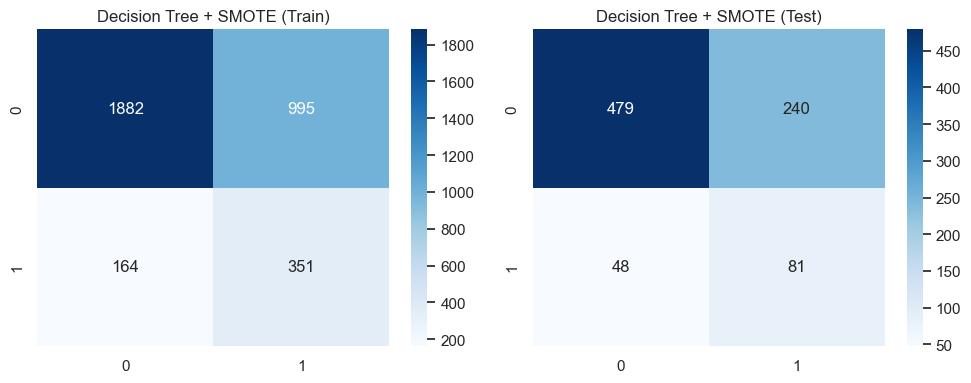

In [59]:
dt_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", DecisionTreeClassifier(
        criterion="gini",
        max_depth=3,
        random_state=42
    ))
])

dt_smote_pipeline.fit(X_train, y_train)

y_train_pred_dt_smote = dt_smote_pipeline.predict(X_train)
y_test_pred_dt_smote  = dt_smote_pipeline.predict(X_test)

print("Decision Tree + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_dt_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_dt_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_dt_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_dt_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_dt_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Decision Tree + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_dt_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Decision Tree + SMOTE (Test)")
plt.tight_layout()
plt.show()


**Decision Tree combined with SMOTE severely overfits the training data due to its high variance nature, resulting in poor minority class generalization. This highlights the necessity of ensemble learning methods to stabilize predictions**

# Bagging

Bagging (Decision Tree) + SMOTE
Train Accuracy: 1.0
Test Accuracy : 0.8183962264150944

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2877
           1       1.00      1.00      1.00       515

    accuracy                           1.00      3392
   macro avg       1.00      1.00      1.00      3392
weighted avg       1.00      1.00      1.00      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       719
           1       0.32      0.17      0.22       129

    accuracy                           0.82       848
   macro avg       0.59      0.55      0.56       848
weighted avg       0.78      0.82      0.79       848



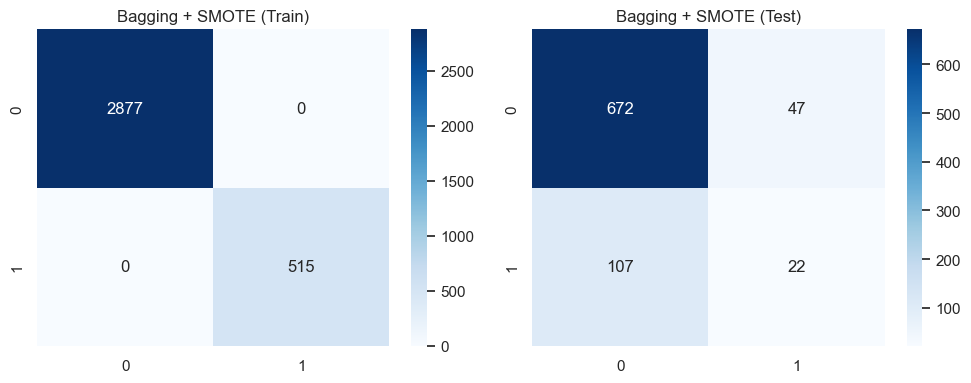

In [61]:
bag_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

bag_smote_pipeline.fit(X_train, y_train)

y_train_pred_bag_smote = bag_smote_pipeline.predict(X_train)
y_test_pred_bag_smote  = bag_smote_pipeline.predict(X_test)

print("Bagging (Decision Tree) + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_bag_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_bag_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_bag_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_bag_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_bag_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Bagging + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_bag_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Bagging + SMOTE (Test)")
plt.tight_layout()
plt.show()

# Random Forst + SMOTE

Random Forest + SMOTE
Train Accuracy: 1.0
Test Accuracy : 0.8254716981132075

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2877
           1       1.00      1.00      1.00       515

    accuracy                           1.00      3392
   macro avg       1.00      1.00      1.00      3392
weighted avg       1.00      1.00      1.00      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       719
           1       0.31      0.12      0.17       129

    accuracy                           0.83       848
   macro avg       0.58      0.53      0.54       848
weighted avg       0.77      0.83      0.79       848



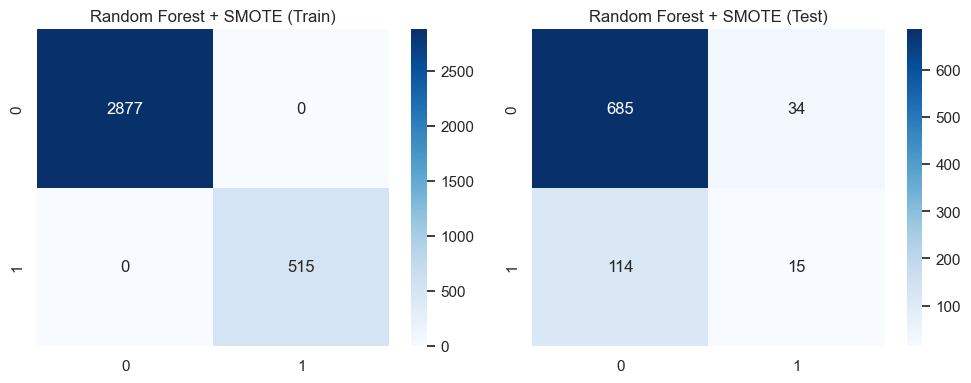

In [62]:
rf_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_smote_pipeline.fit(X_train, y_train)

y_train_pred_rf_smote = rf_smote_pipeline.predict(X_train)
y_test_pred_rf_smote  = rf_smote_pipeline.predict(X_test)

print("Random Forest + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_rf_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_rf_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_rf_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_rf_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_rf_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest + SMOTE (Test)")
plt.tight_layout()
plt.show()

**SMOTE improves minority recall, but ensemble tree models still favor majority class due to impurity-based splits**

# Extra Trees + SMOTE

Extra Trees + SMOTE
Train Accuracy: 1.0
Test Accuracy : 0.8349056603773585

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2877
           1       1.00      1.00      1.00       515

    accuracy                           1.00      3392
   macro avg       1.00      1.00      1.00      3392
weighted avg       1.00      1.00      1.00      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       719
           1       0.36      0.11      0.17       129

    accuracy                           0.83       848
   macro avg       0.61      0.54      0.54       848
weighted avg       0.78      0.83      0.80       848



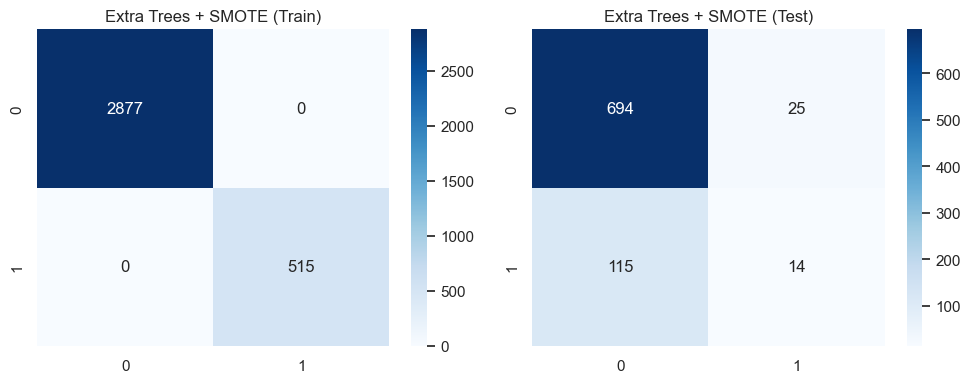

In [63]:
et_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", ExtraTreesClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

et_smote_pipeline.fit(X_train, y_train)

y_train_pred_et_smote = et_smote_pipeline.predict(X_train)
y_test_pred_et_smote  = et_smote_pipeline.predict(X_test)

print("Extra Trees + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_et_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_et_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_et_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_et_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_et_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Extra Trees + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_et_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Extra Trees + SMOTE (Test)")
plt.tight_layout()
plt.show()

**Extra Trees reduces variance, not class imbalance**

# AdaBoost + SMOTE

AdaBoost + SMOTE
Train Accuracy: 0.8030660377358491
Test Accuracy : 0.7912735849056604

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2877
           1       0.34      0.33      0.34       515

    accuracy                           0.80      3392
   macro avg       0.61      0.61      0.61      3392
weighted avg       0.80      0.80      0.80      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       719
           1       0.30      0.28      0.29       129

    accuracy                           0.79       848
   macro avg       0.59      0.58      0.58       848
weighted avg       0.79      0.79      0.79       848



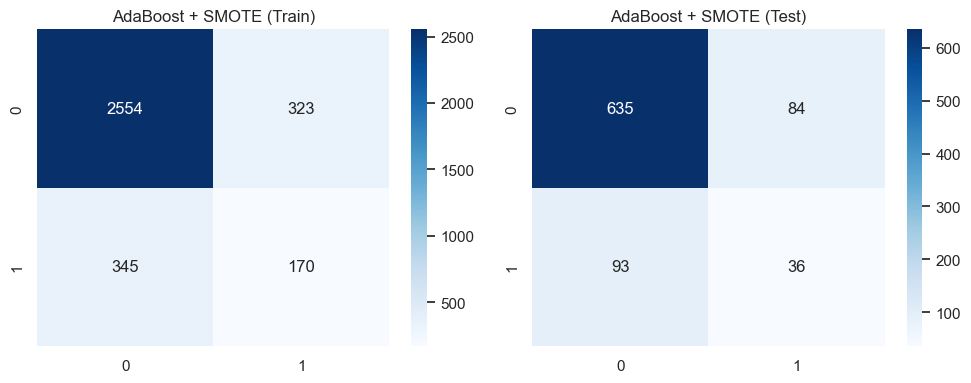

In [64]:
ada_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=1,
            random_state=42
        ),
        n_estimators=100,
        learning_rate=0.5,
        random_state=42
    ))
])

ada_smote_pipeline.fit(X_train, y_train)

y_train_pred_ada_smote = ada_smote_pipeline.predict(X_train)
y_test_pred_ada_smote  = ada_smote_pipeline.predict(X_test)

print("AdaBoost + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_ada_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_ada_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_ada_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_ada_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_ada_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("AdaBoost + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_ada_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("AdaBoost + SMOTE (Test)")
plt.tight_layout()
plt.show()


# Gradient Boosting + SMOTE

Gradient Boosting + SMOTE
Train Accuracy: 0.8773584905660378
Test Accuracy : 0.8325471698113207

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2877
           1       0.73      0.30      0.43       515

    accuracy                           0.88      3392
   macro avg       0.81      0.64      0.68      3392
weighted avg       0.86      0.88      0.85      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       719
           1       0.33      0.10      0.15       129

    accuracy                           0.83       848
   macro avg       0.59      0.53      0.53       848
weighted avg       0.78      0.83      0.79       848



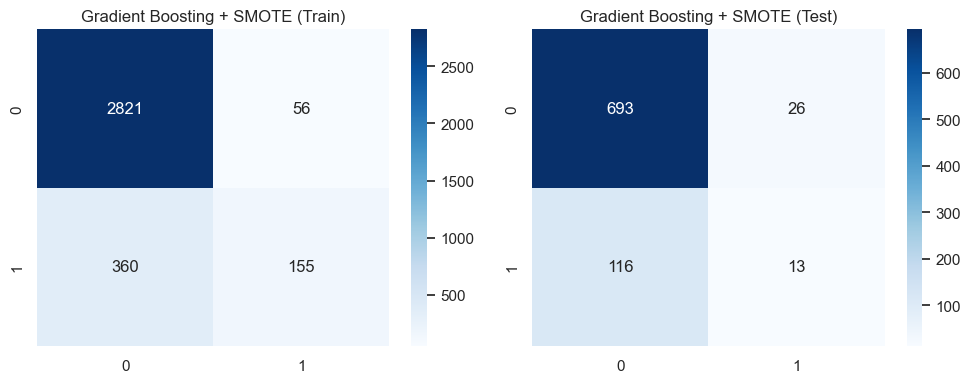

In [54]:
gb_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

gb_smote_pipeline.fit(X_train, y_train)

y_train_pred_gb_smote = gb_smote_pipeline.predict(X_train)
y_test_pred_gb_smote  = gb_smote_pipeline.predict(X_test)

print("Gradient Boosting + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_gb_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_gb_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_gb_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_gb_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_gb_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Gradient Boosting + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_gb_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Gradient Boosting + SMOTE (Test)")
plt.tight_layout()
plt.show()


# SVM + SMOTE

SVM + SMOTE
Train Accuracy: 0.7511792452830188
Test Accuracy : 0.6757075471698113

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2877
           1       0.35      0.77      0.48       515

    accuracy                           0.75      3392
   macro avg       0.65      0.76      0.66      3392
weighted avg       0.86      0.75      0.78      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       719
           1       0.24      0.51      0.32       129

    accuracy                           0.68       848
   macro avg       0.56      0.61      0.56       848
weighted avg       0.79      0.68      0.72       848



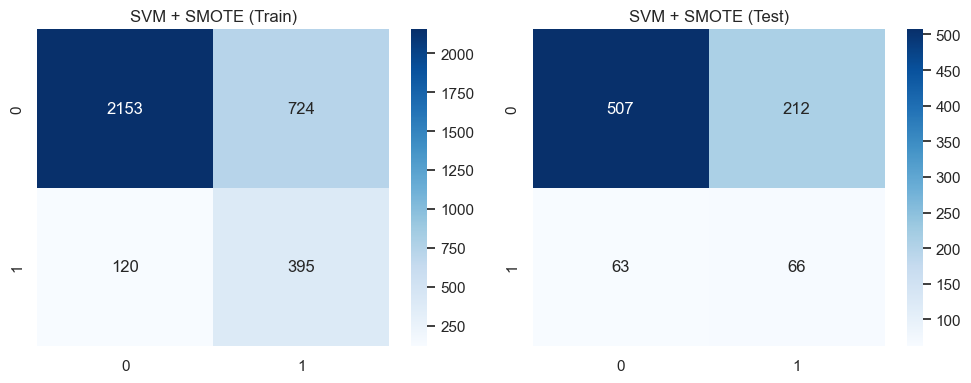

In [65]:
from sklearn.svm import SVC

svm_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_stats),
    ("smote", SMOTE(random_state=42)),
    ("model", SVC(
        kernel="rbf",
        C=1.0,
        gamma="scale",
        probability=True,
        random_state=42
    ))
])

svm_smote_pipeline.fit(X_train, y_train)

y_train_pred_svm_smote = svm_smote_pipeline.predict(X_train)
y_test_pred_svm_smote  = svm_smote_pipeline.predict(X_test)

print("SVM + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_svm_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_svm_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_svm_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_svm_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_svm_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("SVM + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_svm_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("SVM + SMOTE (Test)")
plt.tight_layout()
plt.show()


# XGB => Exterme Gradient 

XGBoost + SMOTE
Train Accuracy: 0.8823702830188679
Test Accuracy : 0.8172169811320755

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2877
           1       0.80      0.30      0.44       515

    accuracy                           0.88      3392
   macro avg       0.84      0.64      0.69      3392
weighted avg       0.87      0.88      0.86      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       719
           1       0.26      0.11      0.15       129

    accuracy                           0.82       848
   macro avg       0.56      0.53      0.53       848
weighted avg       0.76      0.82      0.78       848



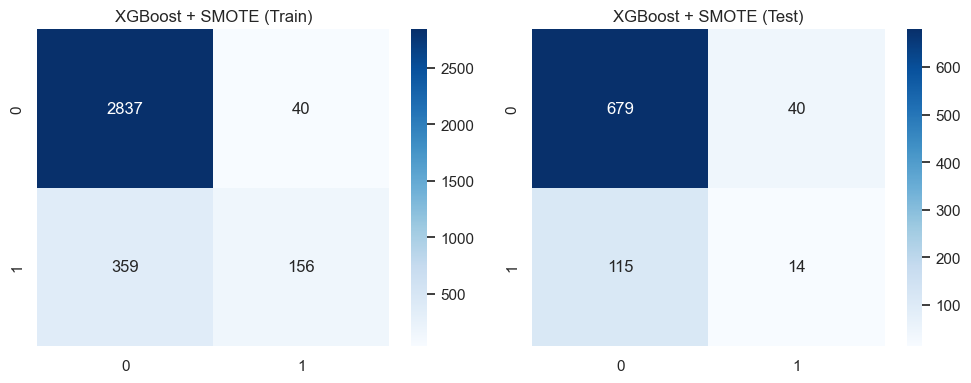

In [56]:
from xgboost import XGBClassifier

xgb_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", XGBClassifier(
        n_estimators=200,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    ))
])

xgb_smote_pipeline.fit(X_train, y_train)

y_train_pred_xgb_smote = xgb_smote_pipeline.predict(X_train)
y_test_pred_xgb_smote  = xgb_smote_pipeline.predict(X_test)

print("XGBoost + SMOTE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_xgb_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_xgb_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_xgb_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_xgb_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_xgb_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("XGBoost + SMOTE (Train)")
sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("XGBoost + SMOTE (Test)")
plt.tight_layout()
plt.show()


# K fold CV = SMote models comparison

In [60]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

models_smote = {
    "Logistic Regression + SMOTE": lr_smote_pipeline,
    "KNN + SMOTE": knn_smote_pipeline,
    "Naive Bayes + SMOTE": nb_smote_pipeline,
    "Decision Tree + SMOTE": dt_smote_pipeline,
    "Random Forest + SMOTE": rf_smote_pipeline,
    "Extra Trees + SMOTE": et_smote_pipeline,
    "AdaBoost + SMOTE": ada_smote_pipeline,
    "Gradient Boosting + SMOTE": gb_smote_pipeline,
    "SVM + SMOTE": svm_smote_pipeline    
}

cv_results = []

for model_name, pipeline in models_smote.items():

    # CROSS-VALIDATED ACCURACY
    cv_acc_scores = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1
    )

    # Fit model on full training data
    pipeline.fit(X_train, y_train)

    # Predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred  = pipeline.predict(X_test)

    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy  = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1  = f1_score(y_test, y_test_pred)

    cv_results.append({
        "Model": model_name,
        "Mean CV Accuracy": cv_acc_scores.mean(),
        "Std CV Accuracy": cv_acc_scores.std(),
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train F1": train_f1,
        "Test F1": test_f1
    })

cv_summary_smote = (
    pd.DataFrame(cv_results)
    .sort_values(by="Mean CV Accuracy", ascending=False)
)

pd.set_option("display.float_format", lambda x: f"{x:.4f}")
display(cv_summary_smote)


,Model,Mean CV Accuracy,Std CV Accuracy,Train Accuracy,Test Accuracy,Train F1,Test F1
5,Extra Trees + SMOTE,0.8461,0.0065,1.0000,0.8349,1.0000,0.1667
7,Gradient Boosting + SMOTE,0.8385,0.0140,0.8774,0.8325,0.4270,0.1548
4,Random Forest + SMOTE,0.8358,0.0072,1.0000,0.8255,1.0000,0.1685
2,Naive Bayes + SMOTE,0.7951,0.0057,0.7960,0.7712,0.3459,0.2707
6,AdaBoost + SMOTE,0.7839,0.0225,0.8031,0.7913,0.3373,0.2892
8,SVM + SMOTE,0.6757,0.0213,0.7512,0.6757,0.4835,0.3243
3,Decision Tree + SMOTE,0.6728,0.0199,0.6583,0.6604,0.3772,0.3600
0,Logistic Regression + SMOTE,0.6698,0.0243,0.6701,0.6592,0.3895,0.3476
1,KNN + SMOTE,0.6509,0.0113,1.0000,0.6203,1.0000,0.2581


**So, We cannot predict Models based on accuracy alone, we also need to check f1 [True Negatives], [CHD = 1] pediction accuracy as well for finding the best model.**

Based on CV Mean Accuracy: I choose **"ADABOOST with SMOTE"**

**AdaBoost showed strong generalization with minimal train–test gap; however, its cross-validated accuracy was lower than tree-based ensemble**

1) Gap b/w Mean CV - Train & Test Accuracy = is very small, High Stability

2) Also, Generalization is also good.

3) Class imbalance is there for all models => especially for this dataset => deals with the most noise as far as we had ever seen

**Let's Start with Grid Search & Random Search Hyperparameter Tuning => For this Dataset**

In [70]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# AdaBoost Classifier
ada_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ))
])

# Parameter grid including None for max_depth
ada_param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.01, 0.1, 1.0],
    "model__estimator__max_depth": [1, 2, 3]
}

# GridSearchCV setup
ada_grid = GridSearchCV(
    estimator=ada_smote_pipeline,
    param_grid=ada_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

# Fit on training data
ada_grid.fit(X_train, y_train)

# Convert results to DataFrame
ada_grid_results = pd.DataFrame(ada_grid.cv_results_)




Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [72]:
# Display best parameters and CV 

print("Best Parameters:")
print(ada_grid.best_params_)

print("Best CV Accuracy:")
print(ada_grid.best_score_)

Best Parameters:
{'model__estimator__max_depth': 2, 'model__learning_rate': 1.0, 'model__n_estimators': 200}
Best CV Accuracy:
0.8219292643615242


# ADABOOST + SMOTE + TUNING

AdaBoost + SMOTE + Tuned
Train Accuracy: 0.8570165094339622
Test Accuracy : 0.8113207547169812

Classification Report (Train Set)
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2877
           1       0.55      0.31      0.40       515

    accuracy                           0.86      3392
   macro avg       0.72      0.63      0.66      3392
weighted avg       0.83      0.86      0.84      3392


Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       719
           1       0.28      0.15      0.19       129

    accuracy                           0.81       848
   macro avg       0.57      0.54      0.54       848
weighted avg       0.77      0.81      0.79       848



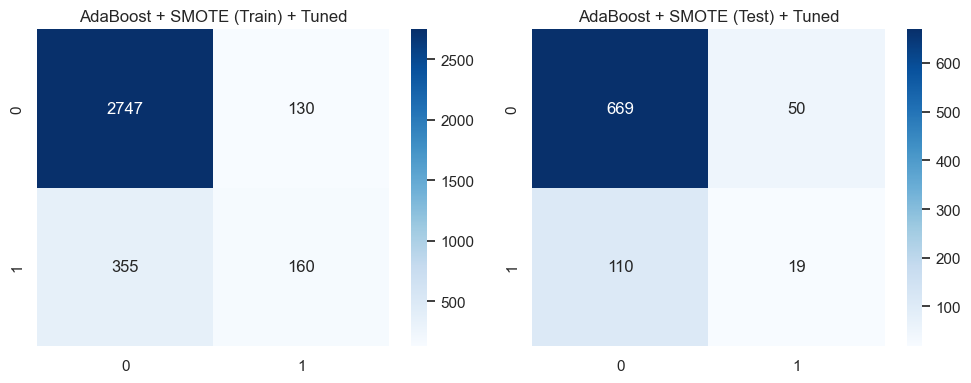

In [75]:
ada_smote_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_tree),
    ("smote", SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=2,                        # Tuned
            random_state=42
        ),
        n_estimators=200,                       #Tuned
        learning_rate=1.0,                      # Tuned
        random_state=42
    ))
])

ada_smote_pipeline.fit(X_train, y_train)

y_train_pred_ada_smote = ada_smote_pipeline.predict(X_train)
y_test_pred_ada_smote  = ada_smote_pipeline.predict(X_test)

print("AdaBoost + SMOTE + Tuned")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_ada_smote))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred_ada_smote))

print("\nClassification Report (Train Set)")
print(classification_report(y_train, y_train_pred_ada_smote))

print("\nClassification Report (Test Set)")
print(classification_report(y_test, y_test_pred_ada_smote))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred_ada_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("AdaBoost + SMOTE (Train) + Tuned")
sns.heatmap(confusion_matrix(y_test, y_test_pred_ada_smote), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("AdaBoost + SMOTE (Test) + Tuned")
plt.tight_layout()
plt.show()


# RandomSearch TUNING

In [79]:
from sklearn.model_selection import RandomizedSearchCV

ada_params = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.01, 0.1, 1.0],
    "model__estimator__max_depth": [1, 2, 3]
}

ada_random = RandomizedSearchCV(
    estimator=ada_smote_pipeline,
    param_distributions=ada_params,
    n_iter=15,
    cv=cv,
    scoring="accuracy",
    random_state=10,
    n_jobs=-1,
    verbose=1
)

ada_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__estimator__max_depth': [1, 2, ...], 'model__learning_rate': [0.01, 0.1, ...], 'model__n_estimators': [50, 100, ...]}"
,n_iter,15
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,10
,error_score,nan


In [80]:
# Display best parameters and CV score

print("Best parameters from Grid Search:")
print(ada_grid.best_params_)

print("\nBest cross-validated accuracy:")
print(ada_grid.best_score_)

Best parameters from Grid Search:
{'model__estimator__max_depth': 2, 'model__learning_rate': 1.0, 'model__n_estimators': 200}

Best cross-validated accuracy:
0.8219292643615242


**AdaBoost + SMOTE + Tuned**

Train Accuracy: 0.8570165094339622

Test Accuracy : 0.8113207547169812

**AdaBoost + SMOTE**

Train Accuracy: 0.8030660377358491

Test Accuracy : 0.7912735849056604

**Accuracy** has been increased to a bit, Train accuracy increased to 5% and Test Accuracy increased to 2 %

Learn Rate 1.0, no. of trees = 200, max depth = 2

# F1 => Trying to Optimize the Accuracy

In [82]:
ada_random_f1 = RandomizedSearchCV(
    estimator=ada_smote_pipeline,
    param_distributions=ada_params,
    n_iter=20,
    cv=cv,
    scoring="f1",   # Changed Scoring from Accuracy => f1
    random_state=10,
    n_jobs=-1,
    verbose=1
)

ada_random_f1.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__estimator__max_depth': [1, 2, ...], 'model__learning_rate': [0.01, 0.1, ...], 'model__n_estimators': [50, 100, ...]}"
,n_iter,20
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,10
,error_score,nan


In [83]:
# Display best parameters and CV score

print("Best parameters from Grid Search:")
print(ada_grid.best_params_)

print("\nBest cross-validated accuracy:")
print(ada_grid.best_score_)

Best parameters from Grid Search:
{'model__estimator__max_depth': 2, 'model__learning_rate': 1.0, 'model__n_estimators': 200}

Best cross-validated accuracy:
0.8219292643615242


**Reaction after doing all the test possible: No comments, Not able to improve accuracy of f1 score of Minority class [CHD =1]**

# Question 1 — Baseline Classification Approaches

For predicting 10-year coronary heart disease (CHD) risk, 3 statistical and 1 computational classification models were implemented:

1) Logistic Regression [balanced]

2) k-Nearest Neighbors (KNN)

3) Naive Bayes

4) Decision Tree 

I had chosen these models because they represent simple statistical and rule-based approaches commonly used as baseline models.

**Data Preparation**

1) Handled missing values with imputation = **median and Most frequent.**
2) Continuous Features were Scaled => using **simple imputer**
3) Categorical Features were **encoded** appropriately
4) For Class Imbalance = **SMOTE technique** is performed across => each models

**Models Performance**

1) Logistic Regression showed stable but limited performance, with lower accuracy and F1-score
   
2) KNN achieved high training accuracy but poor generalization =>  sensitive to noise and overfitting.

3) Decision Tree models lead to overfit the training data, with reduced performance on the test set

**Interpretation:**

1) Baseline models struggled with class imbalance, often favoring the majority non-CHD class

2) Linear models failed to capture complex, non-linear risk patterns between features such as age, blood pressure, prevalent stroke, diabetes, cholesterol, and glucose.

3) ree-based baselines overfit easily without ensemble regularization.

# Question 2 — Ensemble-Based Modeling Approaches

To overcome the limitations observed in baseline models, several ensemble-based classification techniques are used in this notebook:

1) Bagging with Decision Trees

2) Random Forest

3) Extra Trees

4) AdaBoost

5) Gradient Boosting

6) Voting Classifier

These models were selected to improve predictive stability, generalization, and robustness

**Models were evaluated** using:

1) Stratified 5-fold cross-validation

2) Train/Test accuracy

3) F1-score for the minority (CHD = 1) class

4) SMOTE was additionally applied to address class imbalance and assess its impact on ensemble performance.

**Interpretation:**

Ensemble methods consistently achieved high overall accuracy (~ 83–85%), mainly due to strong performance on the majority (non-CHD) class.

Most ensemble models failed to improve minority-class prediction - 

1) Very low test F1-scores for CHD cases

2) Large gaps between train and test F1, indicating overfitting

Tree-based ensembles like Random Forest, Extra Trees, Bagging achieved 100% accuracy, but generalization was very poor.

**AdaBoost showed relatively better:**

1) Smaller train–test accuracy gap

2) Slightly improved minority-class recall

3) Yet still limited gains in test-set F1


Although ensemble models increased overall accuracy, they did not meaningfully enhance minority-class (CHD) prediction.

This explains **MODEL COMPLEXITY**

# Question 3 — Model Refinement and Parameter Optimization

**To refine Best model by tuning the hyperparameters helps us achieve:**

1) Reduce overfitting

2) Improve generalization on unseen data

3) Better capture minority [CHD = 1] cases

Based on baseline, ensemble, and SMOTE-based evaluations, AdaBoost with SMOTE was selected for final refinement.

Among all models, **AdaBoost + SMOTE** showed the best balance between:

1) Cross-validated accuracy - mean cv

2) Train–test performance consistency - test & train accuracy

3) Improved minority-class detection compared to other ensemble methods = CHD - 0 

**Other ensemble models** (Random Forest, Extra Trees, Gradient Boosting) showed:

1) Very high training accuracy

2) Poor minority-class F1 and signs of overfitting

**Handling Class Imbalance**

1) The dataset had a strong class imbalance (fewer CHD cases).

2) SMOTE was integrated within the modeling pipeline to:

3) Generate synthetic CHD-positive samples

4) Improve recall and F1-score for the minority class

5) SMOTE was applied only on training folds to avoid data leakage.

**After using Tuning,**

1) Train accuracy increased to 5%, Test accuracy increased to 2%.